# Flight - UnSupervised Learning

---

Gabrielle Maureen B.S
* [LinkedIn](https://www.linkedin.com/in/gabrielle-maureen-461356238/)
* [Github](https://github.com/gabmrn)

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import uniform
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Ellipse
from matplotlib import rcParams
from yellowbrick.cluster import SilhouetteVisualizer
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
import gdown

print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

numpy version :  1.23.5
pandas version :  1.5.3
seaborn version :  0.12.2


In [2]:
sns.set(rc={'figure.figsize':(20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# Load and Descriptive Statistics

## Load Data

In [3]:
!gdown --id 14G4xOWK5e-QQ9S7GmBwULChNdeJZXs2U

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14G4xOWK5e-QQ9S7GmBwULChNdeJZXs2U
To: /content/flight.csv
100% 8.94M/8.94M [00:00<00:00, 26.8MB/s]


In [4]:
# Using pandas fuction .read_csv() to import the dataset
df = pd.read_csv("flight.csv")
df.sample(5)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
13894       7040  11/23/2012        11/28/2012    Male         4  guangzhou   
11736       7552  10/24/2009         9/23/2010  Female         4     anshan   
13135       5547   7/22/2011         7/22/2011    Male         4   changsha   
43132      17818   3/29/2009         3/29/2009  Female         4   shenyang   
48363      58554   1/15/2010         3/11/2011    Male         4  guangzhou   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
13894     guangdong           CN  33.0  3/31/2014  ...    7434.0       30202   
11736      liaoning           CN  45.0  3/31/2014  ...    4949.0       27368   
13135         hunan           CN  48.0  3/31/2014  ...    6999.0       25060   
43132      liaoning           CN  37.0  3/31/2014  ...    3241.0        5971   
48363     guangdong           CN  33.0  3/31/2014  ...    1342.0        3748   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
13894         2/22/2014           39       28.1875          143   
11736         2/17/2014           44       42.1250          116   
13135          3/1/2014           31       30.0000          126   
43132         3/28/2014            4       53.0000           53   
48363          7/4/2013          272       81.6000          240   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
13894               0      0.562838       20542               15  
11736               0      0.710374       30889                3  
13135               0      0.709849       15570                0  
43132               0      0.664992        3608                0  
48363               0      0.807351        3407                0  

[5 rows x 23 columns]

## Describe Data

In [5]:
# Checking the data incase there are NaN/Null values
print(df.isnull().values.any())
print(df.isna().sum())

True
MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64


**Observation =**

There are 7 columns with missing values/NaN/NULL, i.e.,

1. `GENDER`, 3 rows of missing values.
2. `WORK_CITY`, 2269 rows of missing values.
3. `WORK_PROVINCE`, 3248 rows of missing values.
4. `WORK_COUNTRY`, 26 rows of missing values.
5. `AGE`, 420 rows of missing values.
6. `SUM_YR_1`, 551 rows of missing values.
7. `SUM_YR_2`, 138 rows of missing values.

In [ ]:
# Checking the data incase there are duplicates values
print(df.duplicated().any())
print(df.duplicated().sum())

False
0


In [ ]:
df.duplicated(subset=['MEMBER_NO']).sum()

0

**Observation =**

There's no duplicates values found.

In [ ]:
# Checking the datatype of every columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

**Observasi =**

* Flight dataframe is composed of 23 columns and 62988 rows.
* This dataframe has 8 categorical/object columns and 15 numerical columns.

|Column|Description|Datatype|
|:-:|:-:|:-:|
|MEMBER_NO|Unique Number of ID Member|well-suited|
|FFP_DATE|Frequent Flyer Program Join Date|timestamp (datetimes) is more suitable|
|FIRST_FLIGHT_DATE|Date of the first flight|timestamp (datetimes) is more suitable|
|GENDER|The gender of member holder|well-suited|
|FFP_TIER|Tier of Frequent Flyer Program|well-suited|
|WORK_CITY|Origin City|well-suited|
|WORK_PROVINCE|Origin Province|well-suited|
|WORK_COUNTRY|Origin Country|well-suited|
|AGE|The age of the member holder|well-suited, but since age usually in absolute form, integer is more suitable|
|LOAD_TIME|The date of this data being taken|timestamp (datetimes) is more suitable|
|FLIGHT_COUNT|The customer's number of flight|well-suited|
|BP_SUM|Planned Trip|well-suited|
|SUM_YR_1|Fare Revenue|well-suited|
|SUM_YR_2|Votes Prices|well-suited|
|SEG_KM_SUM|The number of flight distance (km) that has been traveled|well-suited|
|LAST_FLIGHT_DATE|Date of the last flight|timestamp (datetimes) is more suitable|
|LAST_TO_END|The duration from last flight to the next flight that has been reserved|well-suited|
|AVG_INTERVAL|Average the time distance|well-suited|
|MAX_INTERVAL |Maximum the time distance|well-suited|
|EXCHANGE_COUNT|The count of the exchange|well-suited|
|avg_discount|Average discount gained by the customers|well-suited|
|Points_Sum |Total points gained by the customers|well-suited|
|Point_NotFlight|Total points that aren't being used by the customers|well-suited|

In [ ]:
# Grouping the columns based on the datatypes
nums = ['int64', 'int32', 'int16', 'float64', 'float32', 'float16']
nums = df.select_dtypes(include=nums)
nums = nums.columns

cats = ['object']
cats = df.select_dtypes(include=cats)
cats = cats.columns

In [ ]:
# Checking the statistical descritive summary of the numeric columns
df[nums].describe()

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  62988.000000  62988.000000  62568.000000  62988.000000   62988.000000   
mean   31494.500000      4.102162     42.476346     11.839414   10925.081254   
std    18183.213715      0.373856      9.885915     14.049471   16339.486151   
min        1.000000      4.000000      6.000000      2.000000       0.000000   
25%    15747.750000      4.000000     35.000000      3.000000    2518.000000   
50%    31494.500000      4.000000     41.000000      7.000000    5700.000000   
75%    47241.250000      4.000000     48.000000     15.000000   12831.000000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM   LAST_TO_END  \
count   62437.000000   62850.000000   62988.000000  62988.000000   
mean     5355.376064    5604.026014   17123.878691    176.120102   
std      8109.450147    8703.364247   20960.844623    183.822223   
min         0.000000       0.000000     368.000000      1.000000   
25%      1003.000000     780.000000    4747.000000     29.000000   
50%      2800.000000    2773.000000    9994.000000    108.000000   
75%      6574.000000    6845.750000   21271.250000    268.000000   
max    239560.000000  234188.000000  580717.000000    731.000000   

       AVG_INTERVAL  MAX_INTERVAL  EXCHANGE_COUNT  avg_discount   Points_Sum  \
count  62988.000000  62988.000000    62988.000000  62988.000000   62988.0000   
mean      67.749788    166.033895        0.319775      0.721558   12545.7771   
std       77.517866    123.397180        1.136004      0.185427   20507.8167   
min        0.000000      0.000000        0.000000      0.000000       0.0000   
25%       23.370370     79.000000        0.000000      0.611997    2775.0000   
50%       44.666667    143.000000        0.000000      0.711856    6328.5000   
75%       82.000000    228.000000        0.000000      0.809476   14302.5000   
max      728.000000    728.000000       46.000000      1.500000  985572.0000   

       Point_NotFlight  
count     62988.000000  
mean          2.728155  
std           7.364164  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000

In [ ]:
# Checking the statistical descritive summary of the categorical columns
df[cats].describe()

FFP_DATE FIRST_FLIGHT_DATE GENDER  WORK_CITY WORK_PROVINCE  \
count       62988             62988  62985      60719         59740   
unique       3068              3406      2       3234          1165   
top     1/13/2011         2/16/2013   Male  guangzhou     guangdong   
freq          184                96  48134       9386         17509   

       WORK_COUNTRY  LOAD_TIME LAST_FLIGHT_DATE  
count         62962      62988            62988  
unique          118          1              731  
top              CN  3/31/2014        3/31/2014  
freq          57748      62988              959

**Observation =**

Numerical Columns
* `MEMBER_NO`, between mean and median don't have much difference, which indicates to normal distribution.
*	`FFP_TIER`, between mean and median don't have much difference, which indicates to normal distribution.
*	`AGE`, between mean and median don't have much difference, which indicates to normal distribution. The max value of Age reaching 110 years, the fact that it's might be outliers needed to be analyzed.
*	`FLIGHT_COUNT`, mean > median, indicates to positive skewed.
*	`BP_SUM`,mean > median, indicates to positive skewed.
*	`SUM_YR_1`, mean > median, indicates to positive skewed.
*	`SUM_YR_2`, mean > median, indicates to positive skewed.
*	`SEG_KM_SUM`, mean > median, indicates to positive skewed.
*	`LAST_TO_END`, mean > median, indicates to positive skewed.
*	`AVG_INTERVAL`, mean > median, indicates to positive skewed.
*	`MAX_INTERVAL`, mean > median, indicates to positive skewed.
*	`EXCHANGE_COUNT`, between mean and median don't have much difference, which indicates to normal distribution.
*	`avg_discount`, between mean and median don't have much difference, which indicates to normal distribution. The max value of average discount need to be analyzed, normally the range of discount is 0 to 100 ( 0.0 to 0.1) but in this dataframe the maximum discount is 150%, this could be errors.
*	`Points_Sum`, mean > median, indicates to positive skewed.
*	`Point_NotFlight`, mean > median, indicates to positive skewed.

Categorical Columns
* `FFP_DATE`, consist 3068 unique values and the mode is 1/13/2011.
*	`FIRST_FLIGHT_DATE`, consist 3406 unique values and the mode is  2/16/2013.
*	`GENDER`, consist 2 unique values and the mode is Male.
*	`WORK_CITY`, consist 3234 unique values and the mode is guangzhou.
*	`WORK_PROVINCE`, consist 1165 unique values and the mode is guangdong.
*	`WORK_COUNTRY`, consist 118 unique values and the mode is CN.
*	`LOAD_TIME`, consist 1 unique values and the mode is 3/31/2014.
*	`LAST_FLIGHT_DATE`, consist 731 unique values and the mode is 3/31/2014.

In [ ]:
# Checking unique value, mode, dan mode frequency from each columns
num = df[nums]
for i in num:
  x = num[i].mode()[0]
  y = num[i].value_counts()[x]
  z = num[i].nunique()
  print(f'There are {z} unique values and teh mode of column {i} = {x} which frequency {y} values')

There are 62988 unique values and teh mode of column MEMBER_NO = 1 which frequency 1 values
There are 3 unique values and teh mode of column FFP_TIER = 4 which frequency 58066 values
There are 84 unique values and teh mode of column AGE = 47.0 which frequency 2727 values
There are 153 unique values and teh mode of column FLIGHT_COUNT = 2 which frequency 10394 values
There are 23449 unique values and teh mode of column BP_SUM = 0 which frequency 565 values
There are 15828 unique values and teh mode of column SUM_YR_1 = 0.0 which frequency 9915 values
There are 16767 unique values and teh mode of column SUM_YR_2 = 0.0 which frequency 11812 values
There are 29081 unique values and teh mode of column SEG_KM_SUM = 3934 which frequency 298 values
There are 731 unique values and teh mode of column LAST_TO_END = 1 which frequency 959 values
There are 10706 unique values and teh mode of column AVG_INTERVAL = 2.0 which frequency 872 values
There are 706 unique values and teh mode of column MAX_I

In [ ]:
# Checking the Measures of Dispersion
num = df[nums]
for i in num:
  minv = num[i].min()
  maxv = num[i].max()
  Q1 = num[i].quantile(.25)
  Q3 = num[i].quantile(.75)
  total_range = maxv-minv
  var = round(num[i].var(),2)
  iqr = Q3-Q1
  print (f'Measures of Dispersion from column {i}, variance = {var}, range = {total_range}, IQR = {iqr}')

Measures of Dispersion from column MEMBER_NO, variance = 330629261.0, range = 62987, IQR = 31493.5
Measures of Dispersion from column FFP_TIER, variance = 0.14, range = 2, IQR = 0.0
Measures of Dispersion from column AGE, variance = 97.73, range = 104.0, IQR = 13.0
Measures of Dispersion from column FLIGHT_COUNT, variance = 197.39, range = 211, IQR = 12.0
Measures of Dispersion from column BP_SUM, variance = 266978807.69, range = 505308, IQR = 10313.0
Measures of Dispersion from column SUM_YR_1, variance = 65763181.68, range = 239560.0, IQR = 5571.0
Measures of Dispersion from column SUM_YR_2, variance = 75748549.22, range = 234188.0, IQR = 6065.75
Measures of Dispersion from column SEG_KM_SUM, variance = 439357007.32, range = 580349, IQR = 16524.25
Measures of Dispersion from column LAST_TO_END, variance = 33790.61, range = 730, IQR = 239.0
Measures of Dispersion from column AVG_INTERVAL, variance = 6009.02, range = 728.0, IQR = 58.62962963
Measures of Dispersion from column MAX_INTER

# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
# Rechecking the grouping
print(nums)
print(cats)

Index(['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1',
       'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL',
       'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight'],
      dtype='object')
Index(['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE',
       'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE'],
      dtype='object')


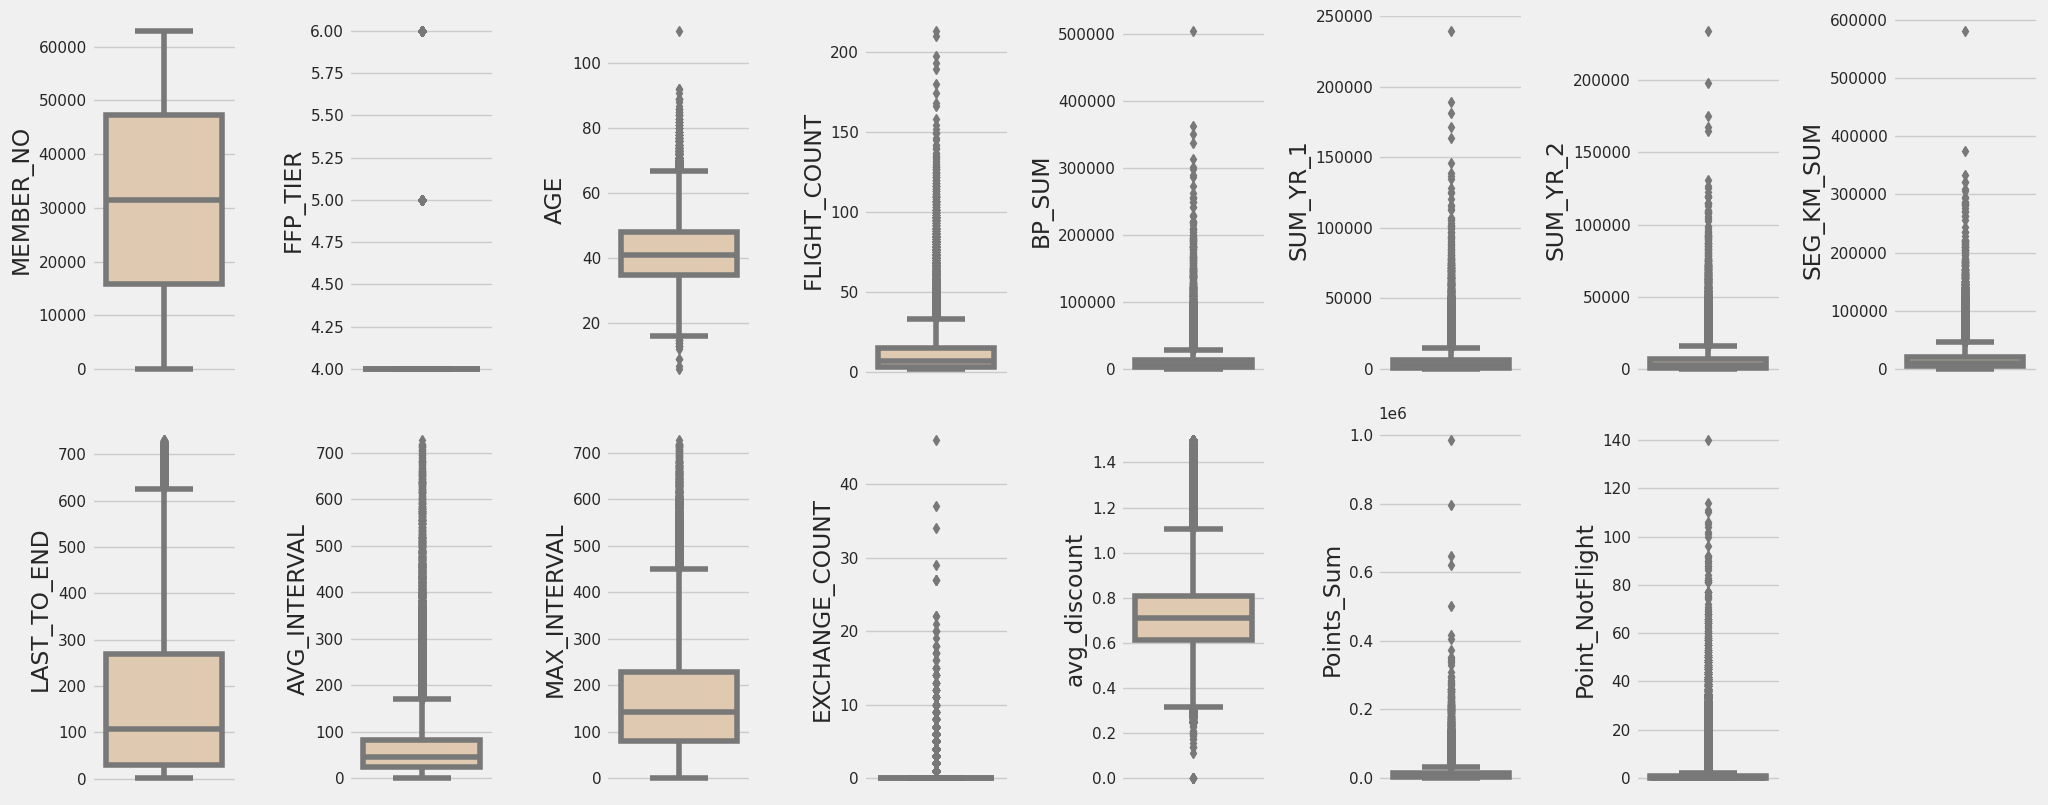

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(2, int(round(len(nums)/2,0)), i+1)
    sns.boxplot(y=df[nums[i]], color = '#E7CBA9', data=df, orient = 'v')
    plt.tight_layout()

**Observasi =**

* `MEMBER_NO`, normal distribution.
*	`FFP_TIER`, normal distribution, this column is a categorical column with 3 unique values (3 tiers) and the majority value is 4 hence this boxplot interpret value 5 and 6 as outliers.
*	`AGE`, normal distribution with outliers.
*	`FLIGHT_COUNT`, positive skewed with outliers.
*	`BP_SUM`, positive skewed with outliers.
*	`SUM_YR_1`, positive skewed with outliers.
*	`SUM_YR_2`, positive skewed with outliers.
*	`SEG_KM_SUM`, positive skewed with outliers.
*	`LAST_TO_END`, positive skewed with outliers.
*	`AVG_INTERVAL`, positive skewed with outliers.
*	`MAX_INTERVAL`, positive skewed with outliers.
*	`EXCHANGE_COUNT`, majority value is 0 which is almost +-80% of the data hence the other values are being assumed as outliers.
*	`avg_discount`, normal distribution with outliers.
*	`Points_Sum`, positive skewed with outliers.
*	`Point_NotFlight`, There are 99 unique values but the 0 value is +-60% of the data dari data hence the other values are being assumed as outliers.

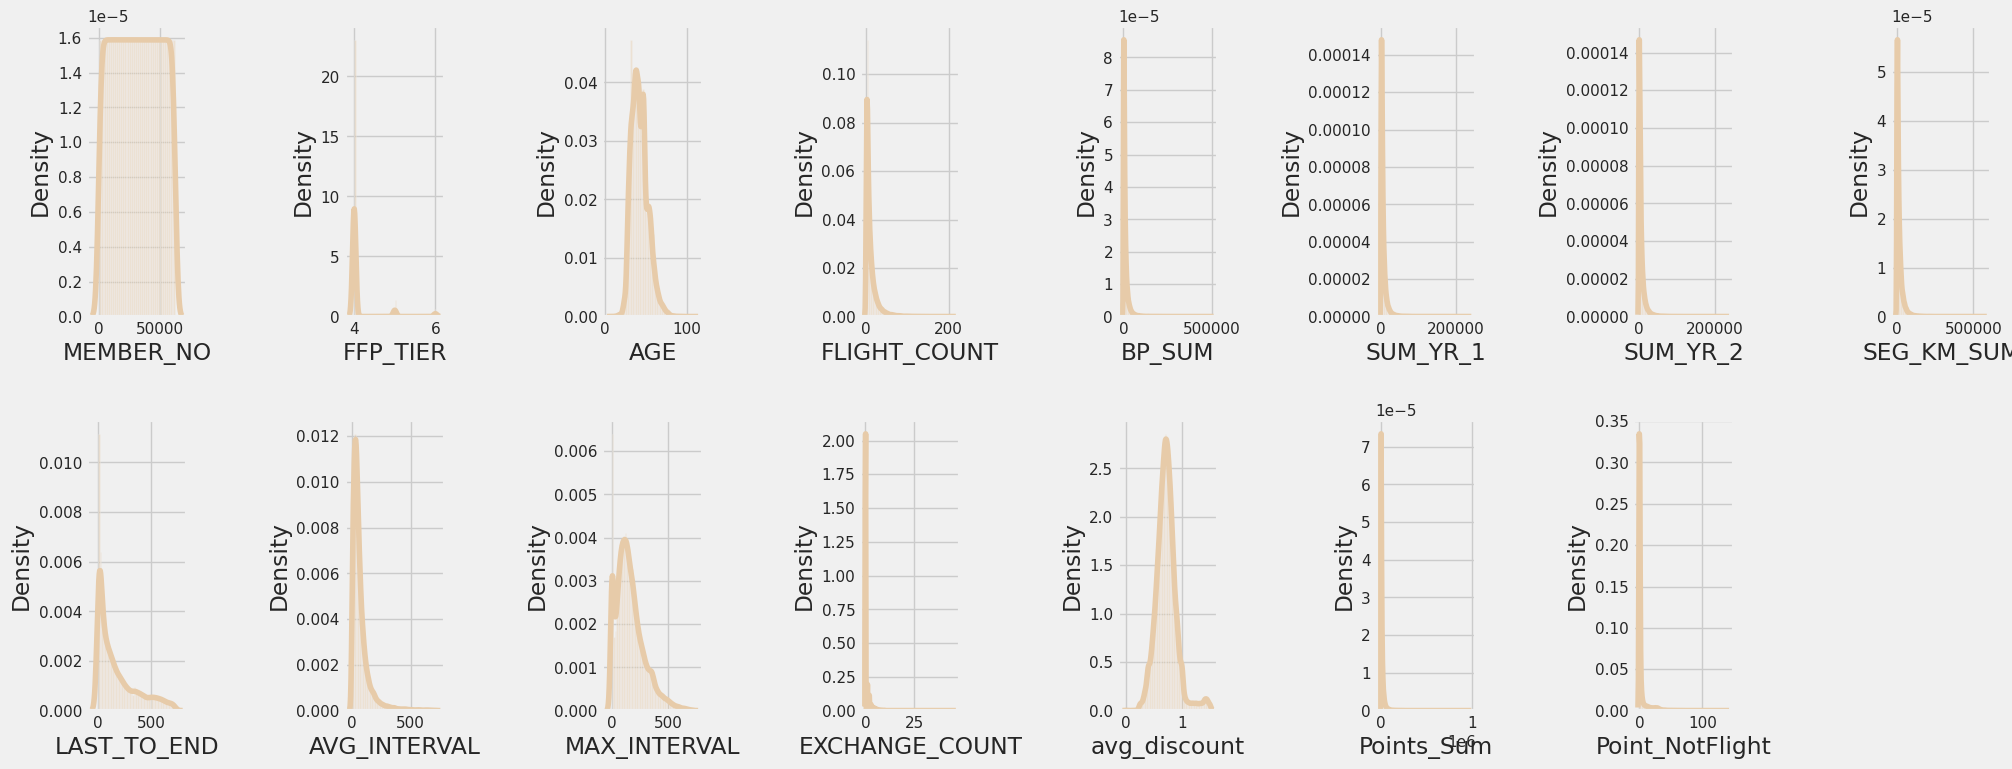

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(2, int(round(len(nums)/2,0)), i+1)
    sns.distplot(df[nums[i]], color='#E7CBA9')
    plt.tight_layout(pad=2)

**Observasi =**

* `MEMBER_NO`, normal distribution.
*	`FFP_TIER`, categorical column, trimodal distribution.
*	`AGE`, normal distribution.
*	`FLIGHT_COUNT`, positive skewed, outliers on the upper limit.
*	`BP_SUM`, positive skewed, outliers on the upper limit.
*	`SUM_YR_1`, positive skewed, outliers on the upper limit.
*	`SUM_YR_2`, positive skewed, outliers on the upper limit.
*	`SEG_KM_SUM`, positive skewed, outliers on the upper limit.
*	`LAST_TO_END`, positive skewed, outliers on the upper limit.
*	`AVG_INTERVAL`, positive skewed, outliers on the upper limit.
*	`MAX_INTERVAL`, positive skewed, outliers on the upper limit.
*	`EXCHANGE_COUNT`, outliers on the upper limit.
*	`avg_discount`, normal distribution, outliers on the upper limit.
*	`Points_Sum`, positive skewed, outliers on the upper limit.
*	`Point_NotFlight`, positive skewed, outliers on the upper limit.

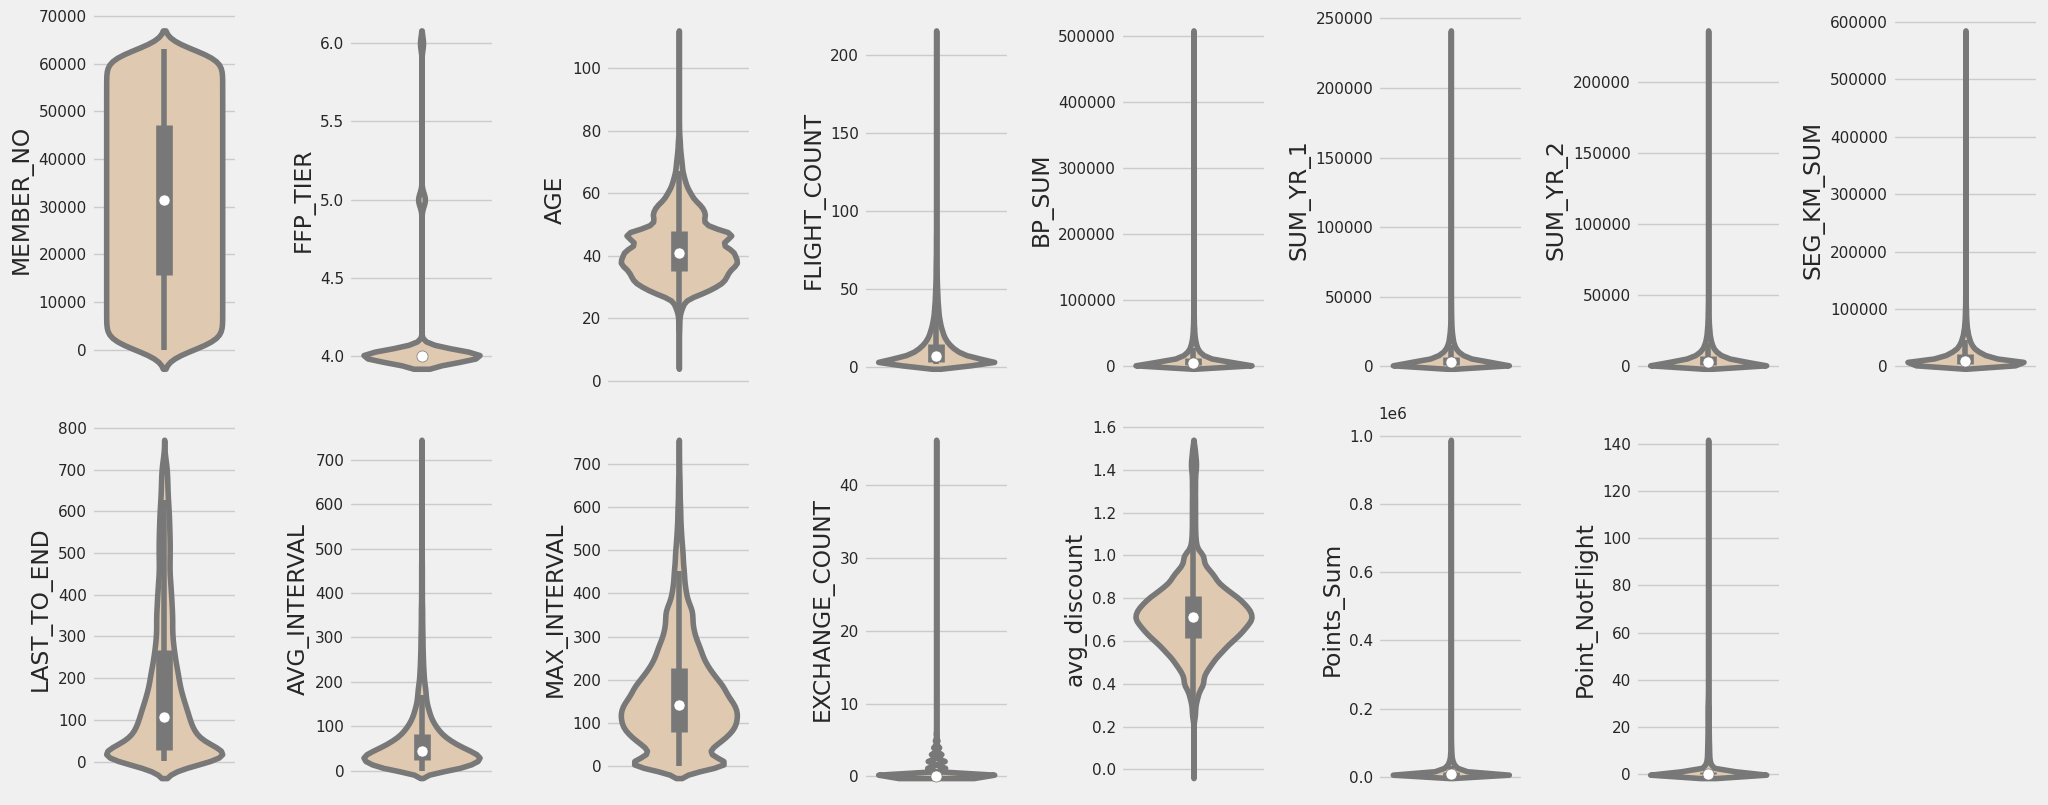

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(2, int(round(len(nums)/2,0)), i+1)
    sns.violinplot(y=df[nums[i]], color='#E7CBA9', orient='v')
    plt.tight_layout()

**Observasi =**

* `MEMBER_NO`, the distribution is spread from 0 to close to 70000.
*	`FFP_TIER`, The distribution is spread from 4 - 6 with the majority of data being 4.
*	`AGE`, the majority of data is spread from ages 25 - 70.
*	`FLIGHT_COUNT`, the majority distribution is spread from 0 - 30.
*	`BP_SUM`, the majority data is 0.
*	`SUM_YR_1`, the majority data is 0.
*	`SUM_YR_2`, the majority data is 0.
*	`SEG_KM_SUM`, the majority of the data is spread from 0 - 3000.
*	`LAST_TO_END`, the majority of the data is spread from 0 - 300.
*	`AVG_INTERVAL`, the majority of the data is spread from 0 - 100.
*	`MAX_INTERVAL`, the majority of the data is spread from 50 - 200.
*	`EXCHANGE_COUNT`, the majority data is 0.
*	`avg_discount`, the majority of data is spread from 0.4 - 1 and the discount data actually doesn't make sense if it is above 1 (100%) so it is necessary to clean outliers above 1.
*	`Points_Sum`, the majority data is 0.
*	`Point_NotFlight`, the majority data is 0.

In [ ]:
data_cat = df.select_dtypes(include=[object])
cat_unique = data_cat.nunique().reset_index()
cat_unique.columns = ['Features','Unique']
cat_unique = cat_unique.sort_values('Unique', ascending=False)
cat_unique

Features  Unique
1  FIRST_FLIGHT_DATE    3406
3          WORK_CITY    3232
0           FFP_DATE    3068
4      WORK_PROVINCE    1165
7   LAST_FLIGHT_DATE     731
5       WORK_COUNTRY     118
2             GENDER       2
6          LOAD_TIME       1

In [6]:
WC_10 = pd.DataFrame(df['WORK_CITY'].value_counts().head(10)).reset_index()
WC_10.columns = ['WORK CITY', 'TOTAL']

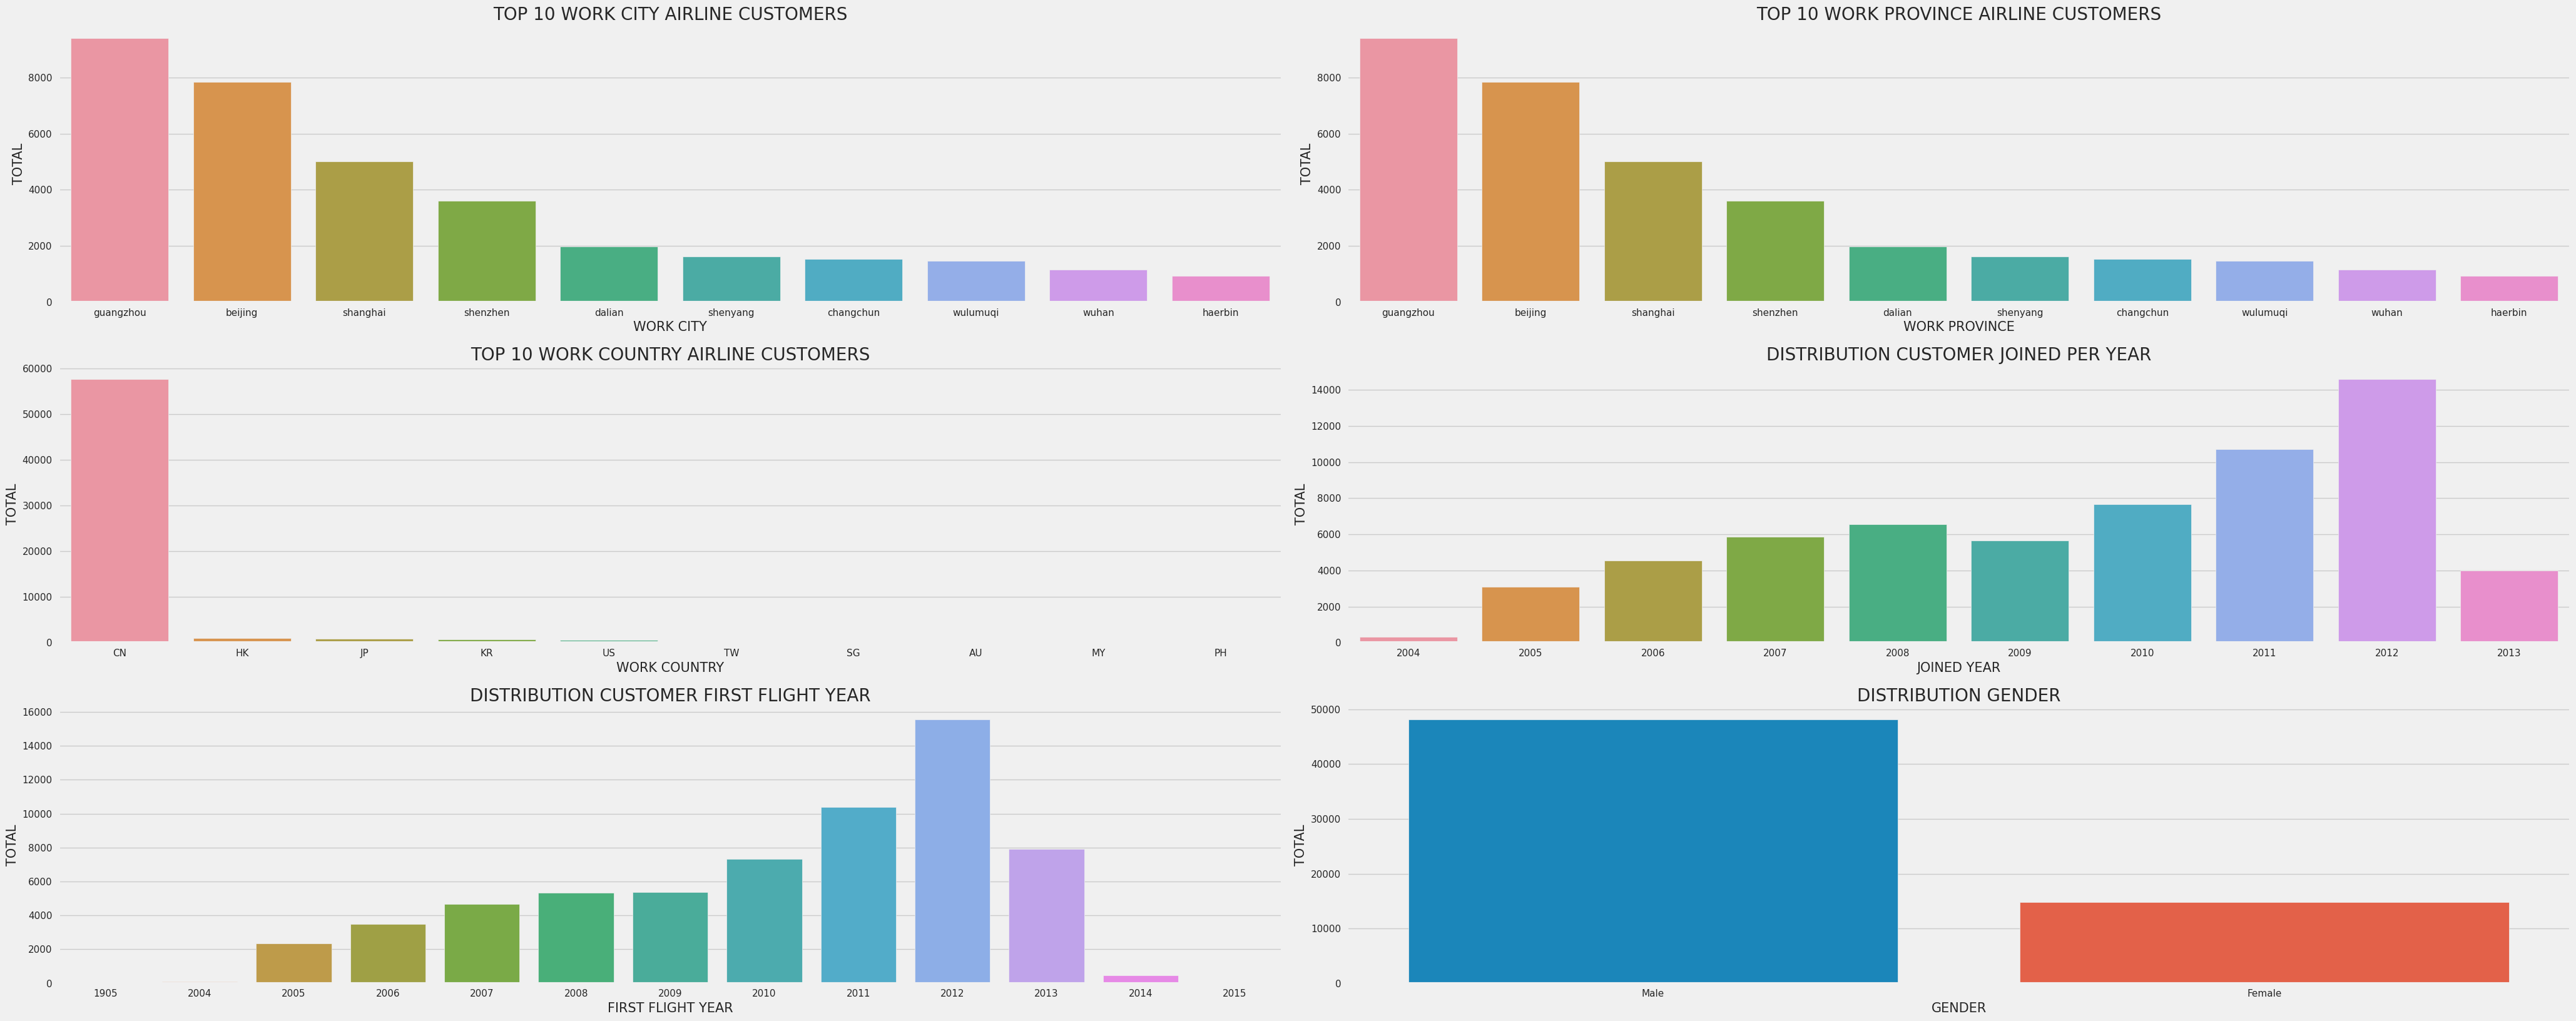

In [7]:
import random

colors = ['#D6EFED','#E0BBe4','#B7D3DF','#957DAD','#E9B666','#F8F3E8','#E6F8F6','#F8DBB8','#CDE8E6','#F6C7B3','#5B96A9']

fig, ax = plt.subplots(3,2)

# Membuat visualisasi 10 WORK_CITY
WC_10 = pd.DataFrame(df['WORK_CITY'].value_counts().head(10)).reset_index()
WC_10.columns = ['WORK CITY', 'TOTAL']
sns.barplot(x=WC_10['WORK CITY'], y=WC_10['TOTAL'], ax=ax[0][0], palette=(random.shuffle(colors)))
ax[0][0].set_title('TOP 10 WORK CITY AIRLINE CUSTOMERS', fontsize=20)
ax[0][0].set_xlabel('WORK CITY', fontsize=15)
ax[0][0].set_ylabel('TOTAL', fontsize=15)

# Membuat visualisasi 10 WORK_PROVINCE
WC_10 = pd.DataFrame(df['WORK_CITY'].value_counts().head(10)).reset_index()
WC_10.columns = ['WORK PROVINCE', 'TOTAL']
sns.barplot(x=WC_10['WORK PROVINCE'], y=WC_10['TOTAL'], ax=ax[0][1], palette=(random.shuffle(colors)))
ax[0][1].set_title('TOP 10 WORK PROVINCE AIRLINE CUSTOMERS', fontsize=20)
ax[0][1].set_xlabel('WORK PROVINCE', fontsize=15)
ax[0][1].set_ylabel('TOTAL', fontsize=15)

# Membuat visualisasi 10 WORK_COUNTRY
WC_10 = pd.DataFrame(df['WORK_COUNTRY'].value_counts().head(10)).reset_index()
WC_10.columns = ['WORK COUNTRY', 'TOTAL']
sns.barplot(x=WC_10['WORK COUNTRY'], y=WC_10['TOTAL'], ax=ax[1][0], palette=(random.shuffle(colors)))
ax[1][0].set_title('TOP 10 WORK COUNTRY AIRLINE CUSTOMERS', fontsize=20)
ax[1][0].set_xlabel('WORK COUNTRY', fontsize=15)
ax[1][0].set_ylabel('TOTAL', fontsize=15)

# Memvisualisasikan FFP TAHUN
FFP_YEAR = pd.to_datetime(df['FFP_DATE']).dt.year
sns.countplot(x=FFP_YEAR, ax=ax[1][1], palette=(random.shuffle(colors)))
ax[1][1].set_xlabel('JOINED YEAR', fontsize=15)
ax[1][1].set_ylabel('TOTAL', fontsize=15)
ax[1][1].set_title('DISTRIBUTION CUSTOMER JOINED PER YEAR', fontsize=20)

# Memvisualisasikan FIRST_FLIGHT_DATE TAHUN
FFD = pd.to_datetime(df['FIRST_FLIGHT_DATE']).dt.year
sns.countplot(x=FFD, ax=ax[2][0], palette=(random.shuffle(colors)))
ax[2][0].set_xlabel('FIRST FLIGHT YEAR', fontsize=15)
ax[2][0].set_ylabel('TOTAL', fontsize=15)
ax[2][0].set_title('DISTRIBUTION CUSTOMER FIRST FLIGHT YEAR', fontsize=20)

# Memvisualisasikan Gender
sns.countplot(x=df['GENDER'], ax=ax[2][1], palette=(random.shuffle(colors)))
ax[2][1].set_xlabel('GENDER', fontsize=15)
ax[2][1].set_ylabel('TOTAL', fontsize=15)
ax[2][1].set_title('DISTRIBUTION GENDER', fontsize=20)

plt.tight_layout(rect=(1,1,3,3))

**Observation =**

* Column `FFP_DATE`, `FIRST_FLIGHT_DATE`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, and `LAST_FLIGHT_DATE` are a categorical columns but has very diverse and complex unique values ​​so it is better to drop it or do features extraction.
* Column `GENDER` need label encoding to facilitate the process of model learning.
* The `LOAD_TIME` column only has 1 value where the data is taken on the same day it is better not to use it for features.

## Multivariate Analysis

<Axes: >

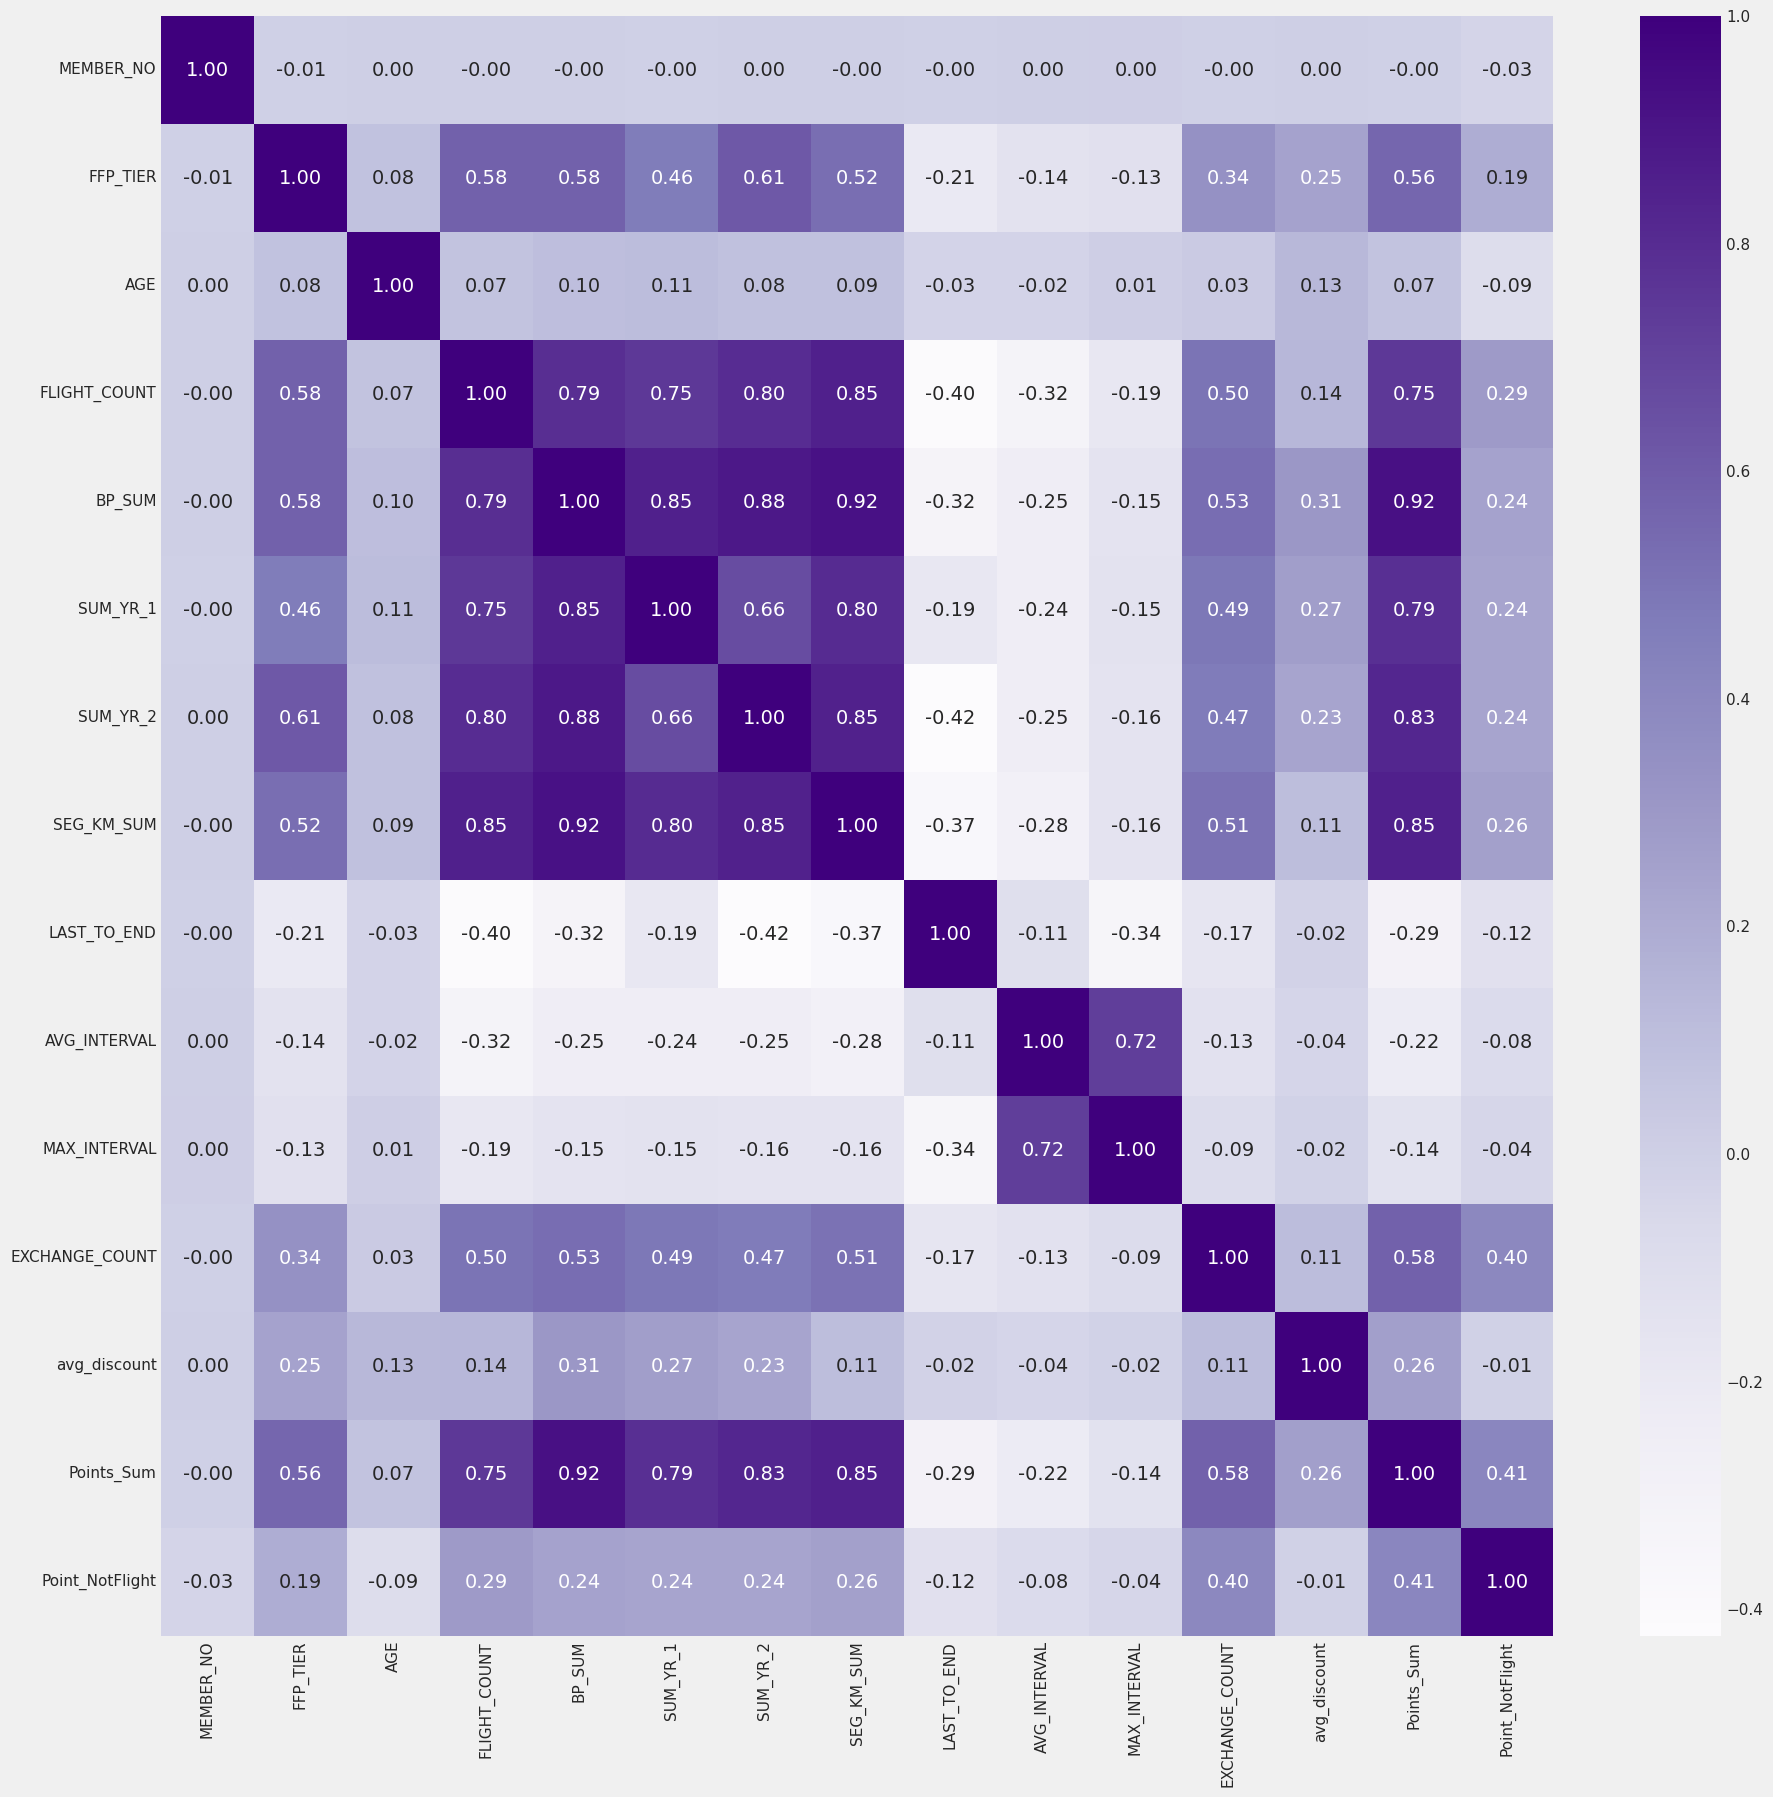

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cmap='Purples', annot=True, fmt='.2f')

**Observation=**

* `AGE` has a very weak correlation with almost every other columns.
* `FLIGHT_COUNT`, `BP_SUM`, `SUM_YR_1`, `SUM_YR_2`, `SEG_KM_SUM` and `Points_Sum` have multicollinearity (redundancy).
* `AVG_INTERVAL` and `MAX_INTERVAL` have multicollinearity (redundancy).

# Data Preprocessing

## Missing Value

In [8]:
missing_value = df.isnull().sum().reset_index()
missing_value.columns = ['Column','Total']
missing_value['Percentage'] = round((missing_value['Total']/len(df))*100,2)
missing_value.sort_values('Total',ascending=False,inplace=True)
missing_value.head(7)

Column  Total  Percentage
6   WORK_PROVINCE   3248        5.16
5       WORK_CITY   2269        3.60
12       SUM_YR_1    551        0.87
8             AGE    420        0.67
13       SUM_YR_2    138        0.22
7    WORK_COUNTRY     26        0.04
3          GENDER      3        0.00

In [9]:
# Special Characters checking
chara = ['.','-','',' ']
col = []

for i, row in df.iterrows():
    for column in df.columns:
        for z in chara:
            if row[column] == z:
              values = f'{z} di {column}'
              col.append(values)
if False:
    print(f"Not found")

In [10]:
# Changing list to set in order to remove duplicate values
col = set(col)
# Checking the special characters result
print(col)
print(f"There are {round((df['WORK_CITY']=='.').sum()/df.shape[0]*100,2)} % characters . in WORK_CITY")
print(f"There are {round((df['WORK_PROVINCE']=='.').sum()/df.shape[0]*100,2)}  % characters . in WORK_PROVINCE")
print(f"There are {round((df['WORK_CITY']=='-').sum()/df.shape[0]*100,2)} % characters - in WORK_CITY")
print(f"There are {round((df['WORK_PROVINCE']=='-').sum()/df.shape[0]*100,2)}  % characters - in WORK_PROVINCE")

{'. di WORK_PROVINCE', '. di WORK_CITY', '- di WORK_PROVINCE', '- di WORK_CITY'}
There are 1.06 % characters . in WORK_CITY
There are 1.48  % characters . in WORK_PROVINCE
There are 0.13 % characters - in WORK_CITY
There are 0.42  % characters - in WORK_PROVINCE


In [12]:
# Drop columns for categorical columns and have very varied unique values ​​(can cause the model to be too complex)
df.drop(columns=['WORK_COUNTRY','WORK_CITY','WORK_PROVINCE'], axis=1, inplace=True)

In [14]:
# Filling AGE column using fillna( pada kolom AGE
df['AGE'].fillna(df['AGE'].median(), inplace=True)

In [15]:
# Drop NaN in GENDER column because the percentage is unsignificant
df.dropna(subset=['GENDER'], inplace=True)

In [16]:
# Using the MICE (Multiple Imputation by Chained Equiation) method where missing values ​​are filled in using a regression model
from fancyimpute import IterativeImputer
mice = IterativeImputer()
x = ['SUM_YR_1','SUM_YR_2']
df[x] = mice.fit_transform(df[x])

In [18]:
# Rechecking missing values
missing_value = df.isnull().sum().reset_index()
missing_value.columns = ['Column','Total']
missing_value['Percentage'] = round((missing_value['Total']/len(df))*100,2)
missing_value.sort_values('Total',ascending=False,inplace=True)
missing_value.head(7)

Column  Total  Percentage
0        MEMBER_NO      0         0.0
1         FFP_DATE      0         0.0
18      Points_Sum      0         0.0
17    avg_discount      0         0.0
16  EXCHANGE_COUNT      0         0.0
15    MAX_INTERVAL      0         0.0
14    AVG_INTERVAL      0         0.0

## Duplicated Values

From the results of checking the Data Description, there are no duplications in the dataset.

## Outliers

In [19]:
# Remove avg_discount above 1 / 100%
df = df[df['avg_discount']<=1]
df[['avg_discount']].describe()

avg_discount
count  60040.000000
mean       0.695878
std        0.144029
min        0.000000
25%        0.605630
50%        0.703391
75%        0.794527
max        1.000000

In [20]:
# Grouping data that is right skewed
right_skewed = ['FLIGHT_COUNT','BP_SUM','SUM_YR_1','SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'Points_Sum', 'Point_NotFlight']

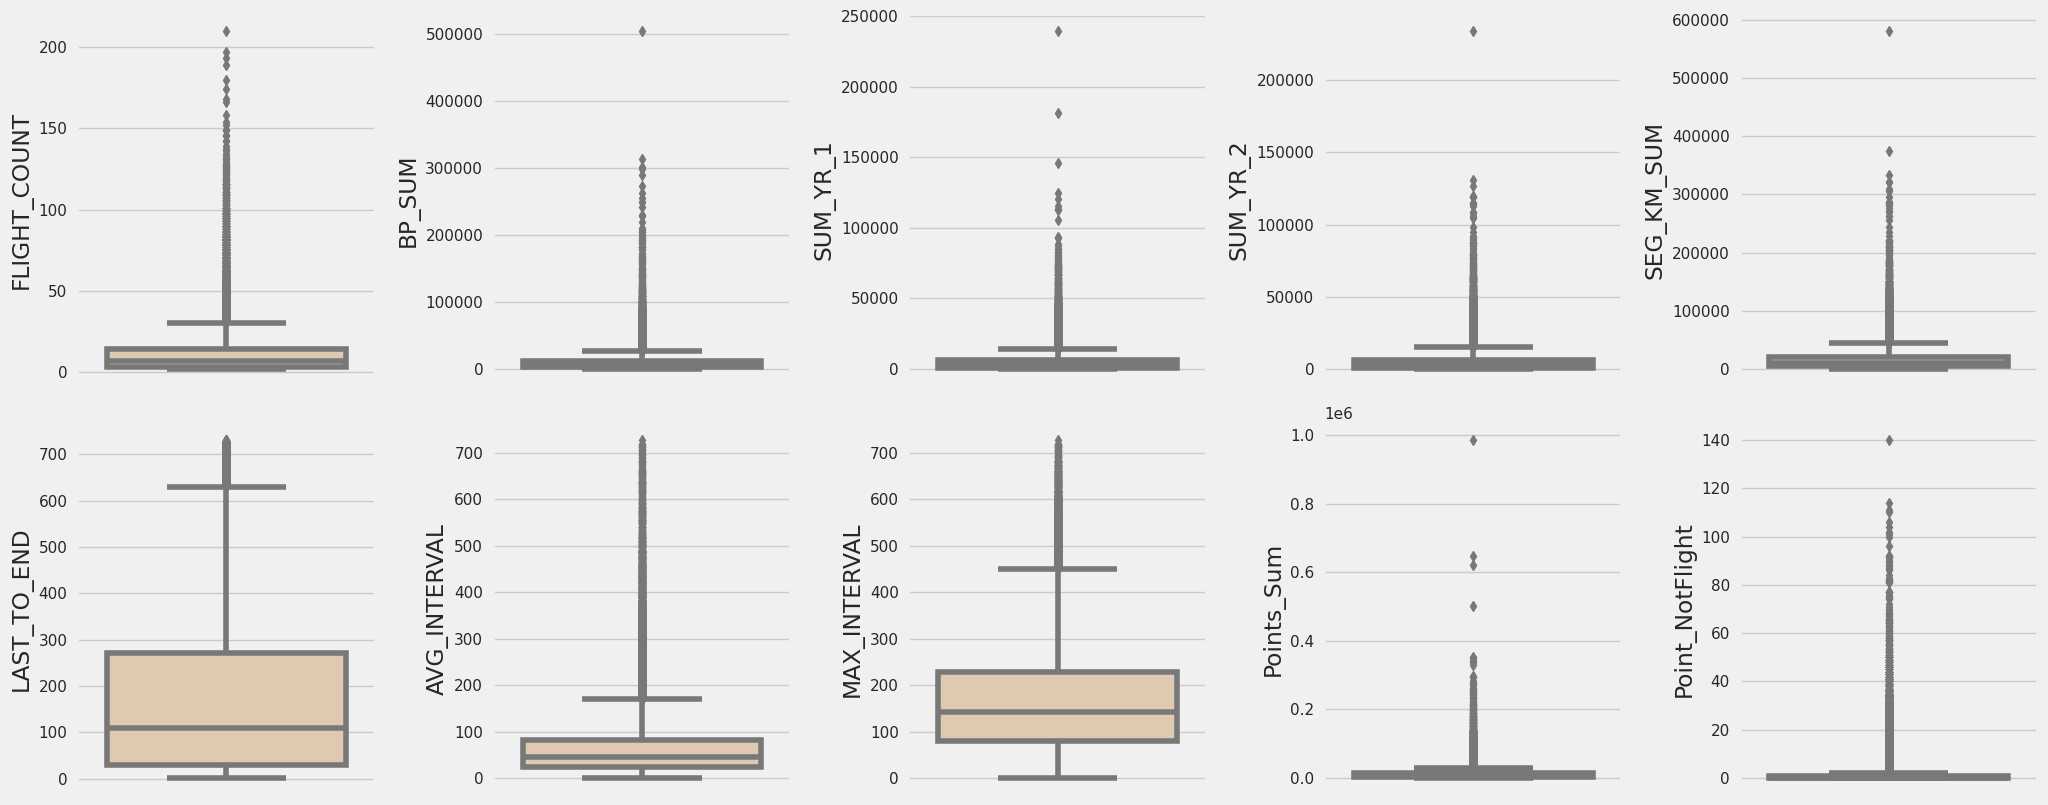

In [21]:
# Boxplot visualization of data before log transformation is carried out
for i in range(0, len(right_skewed)):
    plt.subplot(2, int(round(len(right_skewed)/2,0)), i+1)
    sns.boxplot(y=df[right_skewed[i]], color = '#E7CBA9', data=df, orient = 'v')
    plt.tight_layout()

In [22]:
for i in right_skewed:
    df["log_"+i] = np.log(df[i] + (df[df[i] > 0][i].min() / 2))

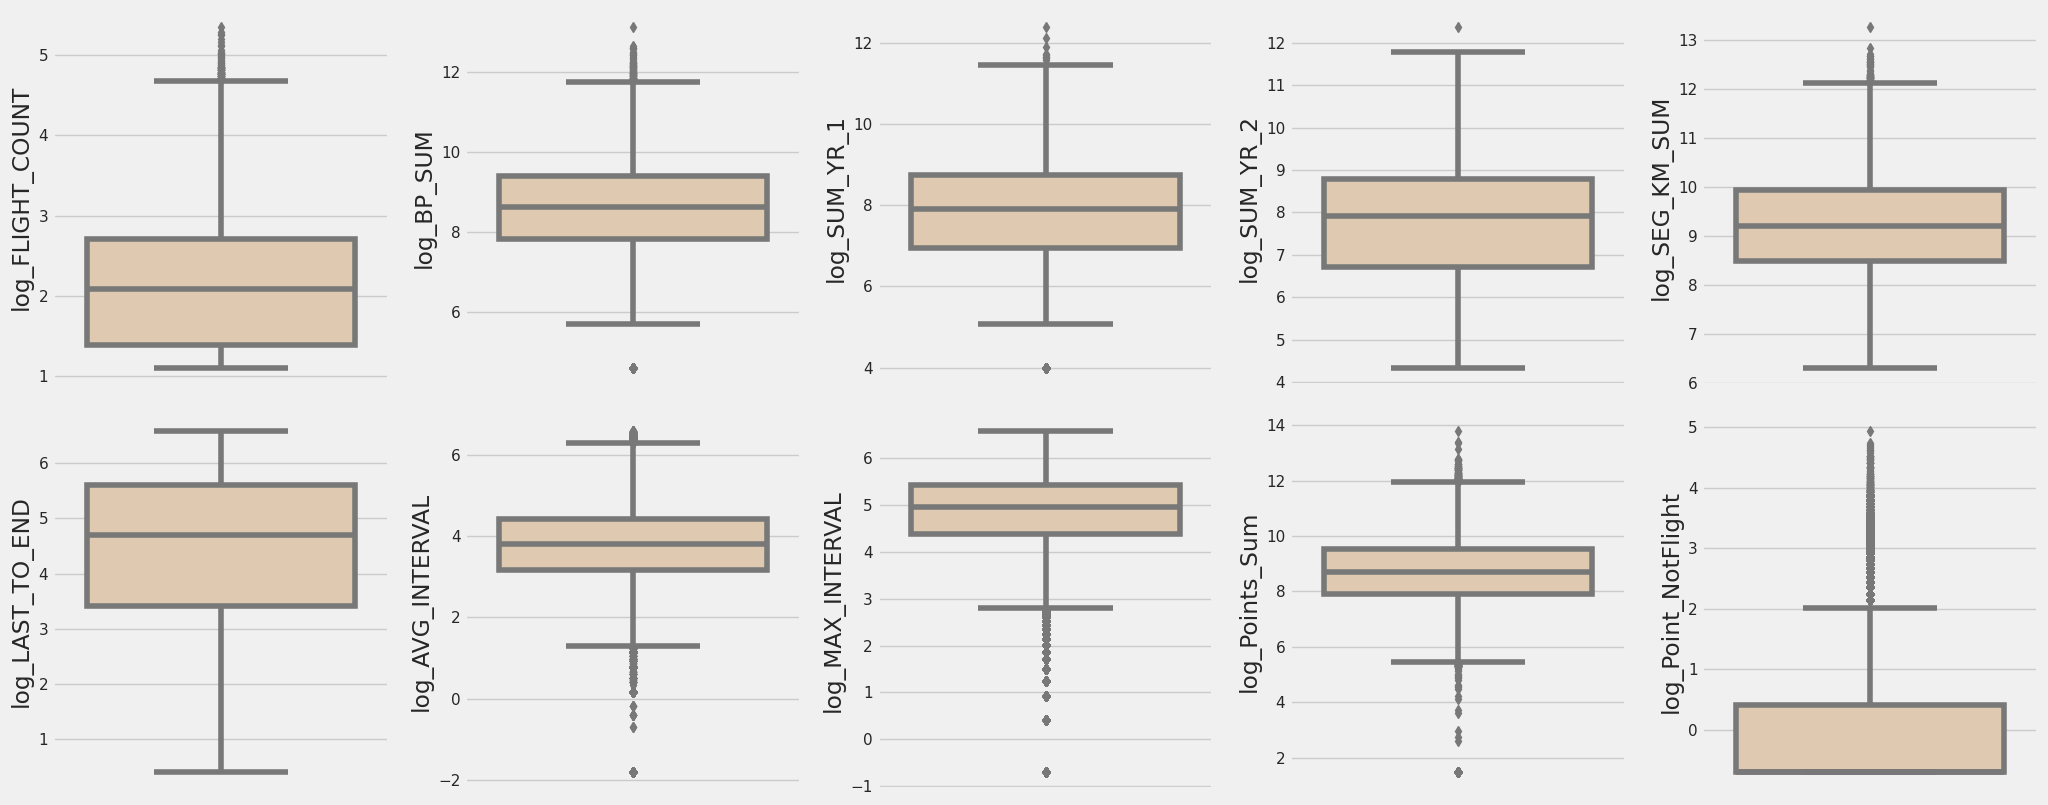

In [ ]:
# Boxplot visualization of data after log transformation is carried out
right_skewed = ['log_FLIGHT_COUNT','log_BP_SUM','log_SUM_YR_1','log_SUM_YR_2', 'log_SEG_KM_SUM', 'log_LAST_TO_END', 'log_AVG_INTERVAL', 'log_MAX_INTERVAL', 'log_Points_Sum', 'log_Point_NotFlight']

for i in range(0, len(right_skewed)):
    plt.subplot(2, int(round(len(right_skewed)/2,0)), i+1)
    sns.boxplot(y=df[right_skewed[i]], color = '#E7CBA9', data=df, orient = 'v')
    plt.tight_layout()

In [23]:
# Handling Outliers using z-score
zscores = ['MEMBER_NO', 'FFP_TIER', 'AGE', 'log_FLIGHT_COUNT', 'log_BP_SUM', 'log_SUM_YR_1', 'log_SUM_YR_2', 'log_SEG_KM_SUM', 'log_LAST_TO_END',
                'log_AVG_INTERVAL', 'log_MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'log_Points_Sum', 'log_Point_NotFlight']

print(f'Total Rows BEFORE Outlier Handling = {len(df)}')

filtered_entries = np.array([True] * len(df))

for i in zscores:
    zscore = abs(stats.zscore(df[i]))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]

print(f'Total Rows AFTER Outlier Handling = {len(df)}')

Total Rows BEFORE Outlier Handling = 60040
Total Rows AFTER Outlier Handling = 56028


In [33]:
print(f'Removing total {60040 - 56028} datas, equal to {round((60040 - 56028)/60040*100,2)} % datas.')

Removing total 4012 datas, equal to 6.68 % datas.


## Feature Encoding

In [25]:
# Perform one hot encoding for the GENDER column
for i in ['GENDER']:
    onehots = pd.get_dummies(df['GENDER'], prefix='Gen')
    df = df.join(onehots)

df[['Gen_Female','Gen_Male']] = df[['Gen_Female','Gen_Male']].astype(int)

# Feature Engineering

Changing datatypes of `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, and `LAST_FLIGHT_DATE` to datetimes types.

In [26]:
df['FFP_DATE'] = pd.to_datetime(df['FFP_DATE'])
df['FIRST_FLIGHT_DATE'] = pd.to_datetime(df['FIRST_FLIGHT_DATE'])
df['LOAD_TIME'] = pd.to_datetime(df['LOAD_TIME'])
df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], errors='coerce')

Create a feature for the length of time a customer has joined the Frequent Flyer Program membership.

In [28]:
# Creating the customers FFP Membership joined duration
df['JOIN_DURATION'] = df['LOAD_TIME'] - df['FFP_DATE']
df['JOIN_DURATION'] = df['JOIN_DURATION'].dt.days

## Feature Selection

In customer segmentation, the "LRFMC" segmentation method is used where this reference is obtained from articles published with the title [Analysis Method for Customer Value of Aviation Big Data Based on LRFMC Model](https://www.researchgate.net/publication/343777831_Analysis_Method_for_Customer_Value_of_Aviation_Big_Data_Based_on_LRFMC_Model).

In this article there is a quote from Yang Tao (2020),
"...In summary, this case uses the duration of membership L, consumption interval R, consumption frequency F, flight mileage M and average discount factor C as airline identification customer value indicators, and the specific meaning of each indicator is shown in Table 5 below. ..."

Where this case is very similar to this dataset,
* L (Length) = `JOIN_DURATION`
* R (Recency) = `LAST_TO_END`
* F (Frequency) = `FLIGHT_COUNT`
* M (Miles) = `SEG_KM_SUM`
* C (Count) = `avg_discount`

In [29]:
Features = ['JOIN_DURATION', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM', 'avg_discount']
df_new = df[Features]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56028 entries, 114 to 62975
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   JOIN_DURATION  56028 non-null  int64  
 1   LAST_TO_END    56028 non-null  int64  
 2   FLIGHT_COUNT   56028 non-null  int64  
 3   SEG_KM_SUM     56028 non-null  int64  
 4   avg_discount   56028 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 4.6 MB


## Feature Transformation

In addition to dealing with outliers, it is important to standardize before clustering. This is because if the range is not equal, clustering will assume that the larger scale is the most important feature.

In [30]:
# Standardize using StandardScaler
scaler = StandardScaler()
scaler.fit(df_new)
x_std = scaler.transform(df_new)
df_std = pd.DataFrame(x_std, columns = df_new.columns)

In [32]:
df_std.sample(5)

JOIN_DURATION  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
1346        0.824639    -0.947959      3.015181    2.511587      0.690480
28088       1.355590    -0.522942     -0.517728   -0.187159     -1.161471
10475      -0.049093    -0.219358      0.297559    0.416616      0.556409
21414       0.668829     0.360211     -0.336553   -0.302647      1.381556
29754      -1.000730     0.183580     -0.427141   -0.323728     -0.679130

# K-Means Clustering - PCA

In [ ]:
inertia = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df_std)
    inertia.append(kmeans.inertia_)

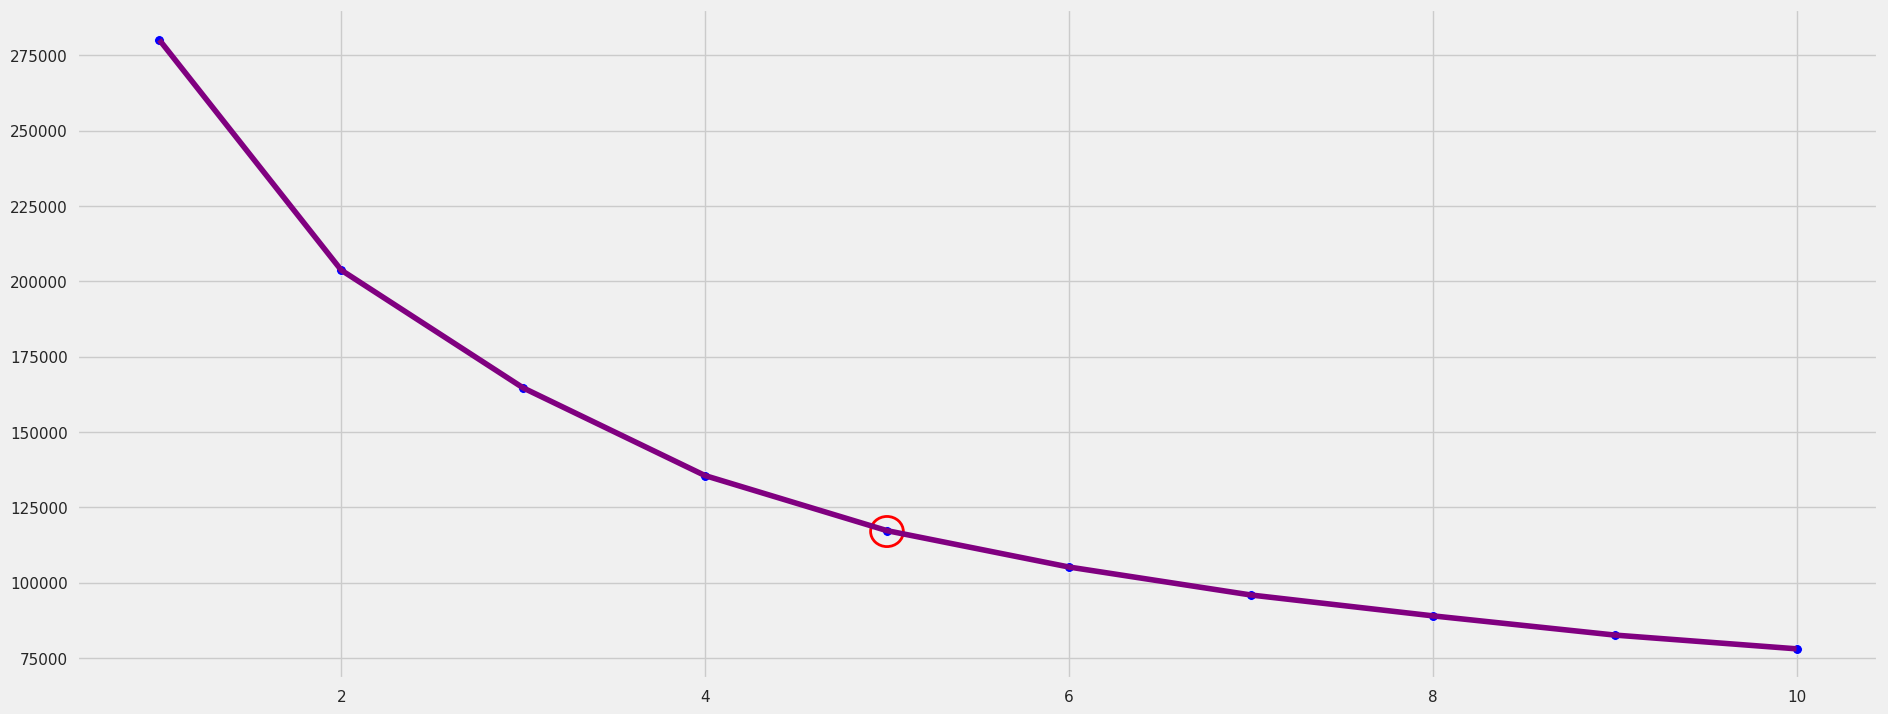

In [ ]:
sns.lineplot(x=range(1,11), y = inertia, color = 'purple')
sns.scatterplot(x=range(1,11), y = inertia, s = 50, color = 'blue')
circle = patches.Ellipse((5, 117000), width=0.18, height=10000, color='red', fill=False, linewidth=2)
plt.gca().add_patch(circle)
plt.gca().autoscale_view()
plt.show()

In [ ]:
round((pd.Series(inertia)/pd.Series(inertia).shift(-1))/pd.Series(inertia)*100,5)

0    0.00049
1    0.00061
2    0.00074
3    0.00085
4    0.00095
5    0.00104
6    0.00112
7    0.00121
8    0.00128
9        NaN
dtype: float64

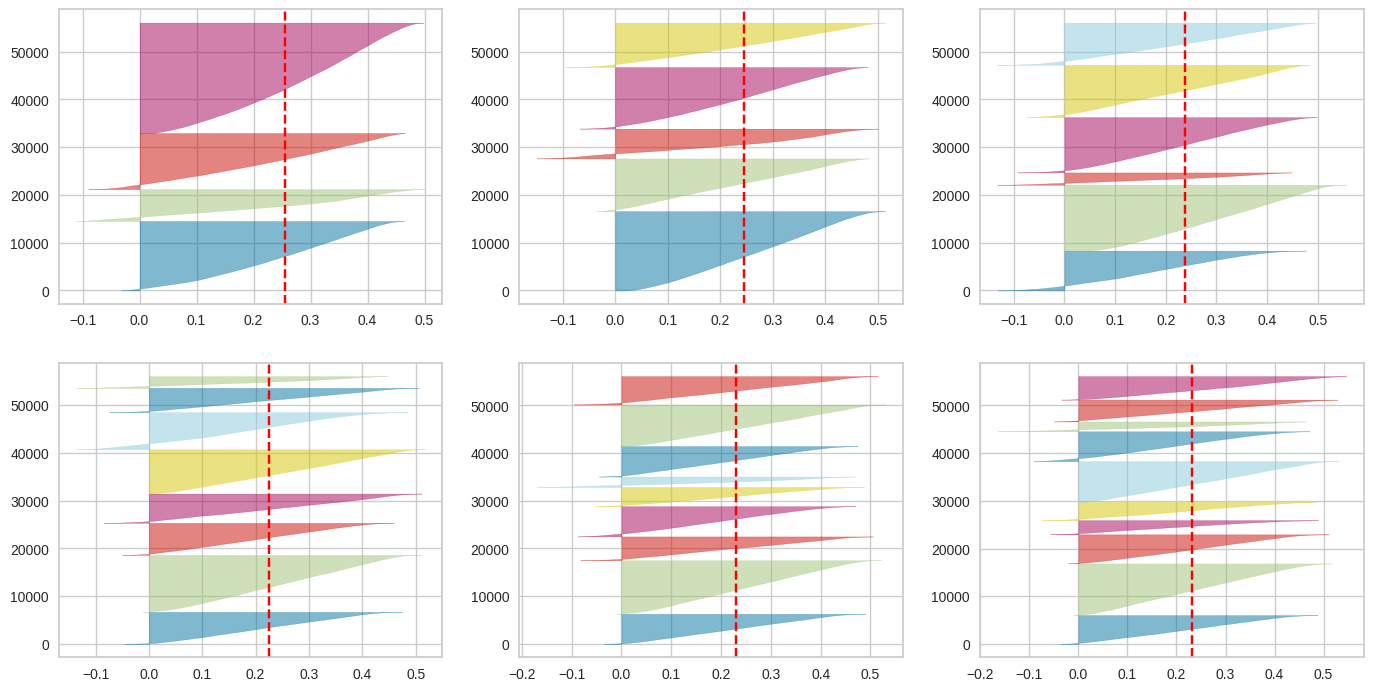

In [ ]:
n_cluster = [4,5,6,8,9,10]
fig, ax = plt.subplots(2, 3, figsize=(15,8))
for i in n_cluster:
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 4)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_std)

It can be seen from the visualization of the silhouette score and inertia of the cluster with the highest average and each cluster achieving an average and significant change in inertia is 5.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df_std)
df_std['Labels'] = kmeans.labels_
df_std.sample(5)

JOIN_DURATION  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount  \
22290      -1.069047     1.353757     -0.245966   -0.042524     -0.669961   
52929      -0.894060     2.733683     -0.789490   -0.849166      1.582294   
23355       1.228545    -0.887242      0.478733   -0.207812      0.007156   
22809       1.197383    -0.252476     -0.427141   -0.322628      1.124814   
43703      -0.166550    -0.429107     -0.698903   -0.629740     -0.938234   

       Labels  
22290       4  
52929       4  
23355       3  
22809       3  
43703       1

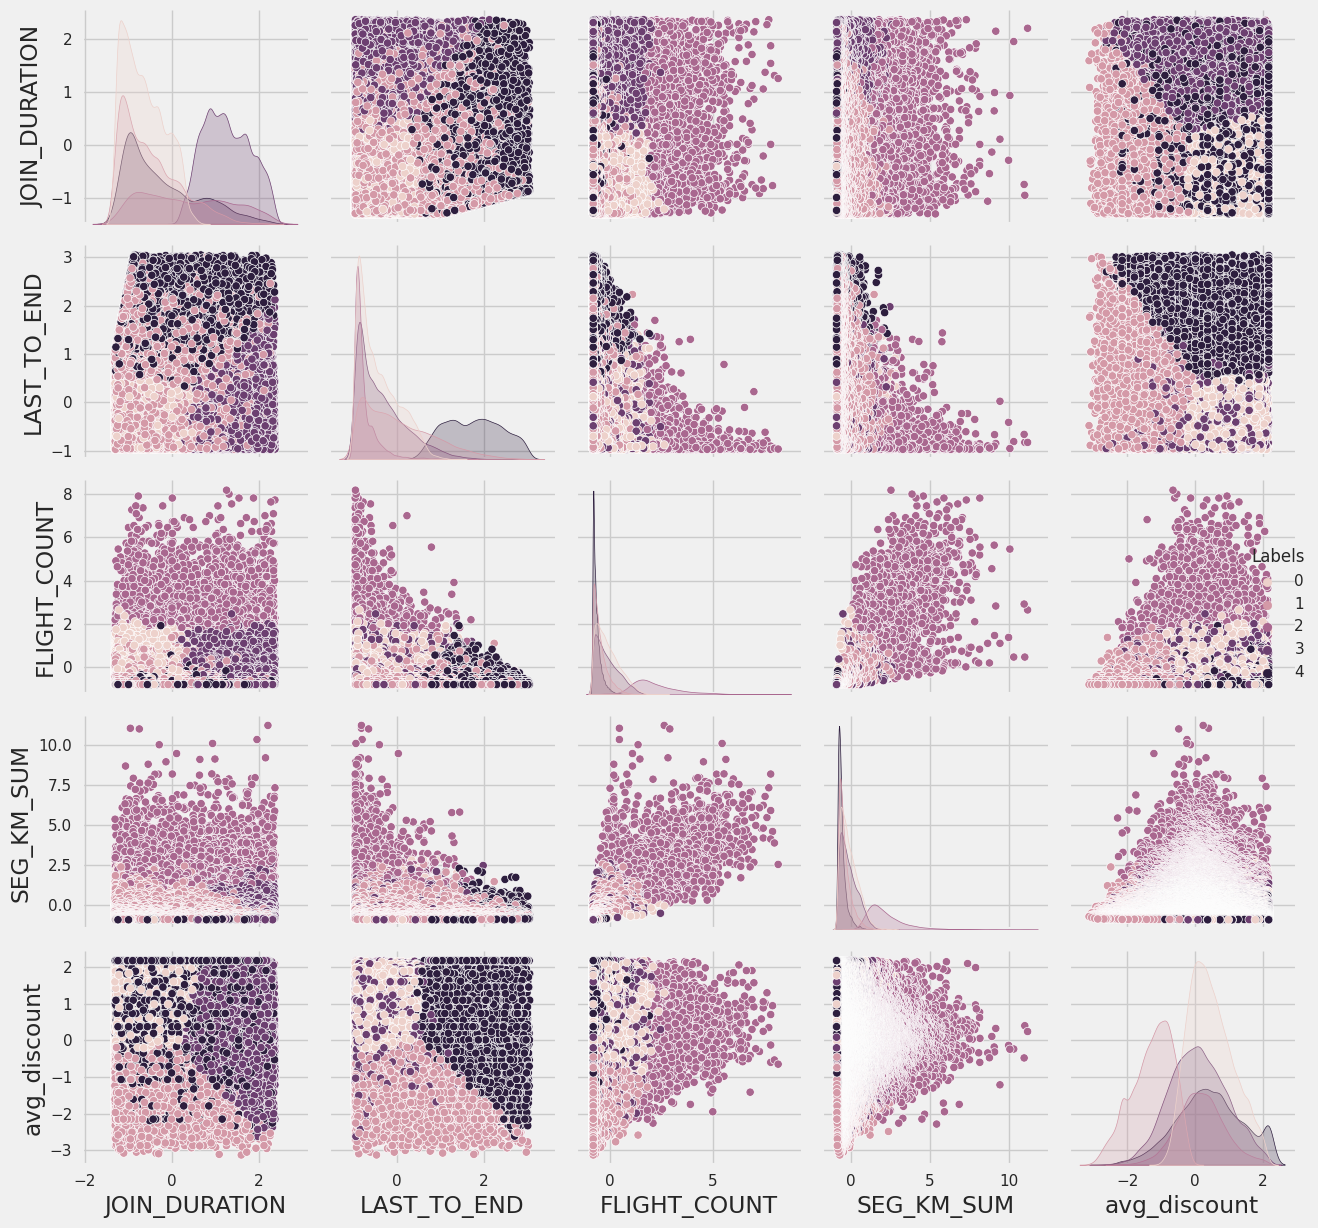

In [ ]:
sns.pairplot(data=df_std, hue='Labels', diag_kind='kde', palette=(random.shuffle(colors)))
plt.tight_layout()

## Principal Component Analysis

In [ ]:
# Spliting dataframe Labels
y = pd.DataFrame(df_std['Labels'].values, columns=['Labels'])

In [ ]:
# Performing PCA
pca = PCA(n_components=2)

pca.fit(df_std)
pcas = pca.transform(df_std)

# Changing pca result to dataframe
df_pca = pd.DataFrame(data = pcas, columns = ['PC1', 'PC2'])
df_pca.describe()

PC1           PC2
count  56028.000000  5.602800e+04
mean       0.000000 -4.869858e-17
std        1.691503  1.447849e+00
min       -3.310981 -2.587070e+00
25%       -1.455932 -1.026449e+00
50%       -0.554077 -3.427475e-01
75%        1.357405  5.875501e-01
max        3.989519  1.011250e+01

In [ ]:
# Combining df_pca and y dataframes
df_pca['Labels'] = y
df_pca.sample(5)

PC1       PC2  Labels
12889 -1.932478  0.064055       0
9754   0.734847  1.371863       3
51777  2.988581 -1.059597       4
31359 -0.768314 -1.179037       1
7046  -1.143710  2.043267       2

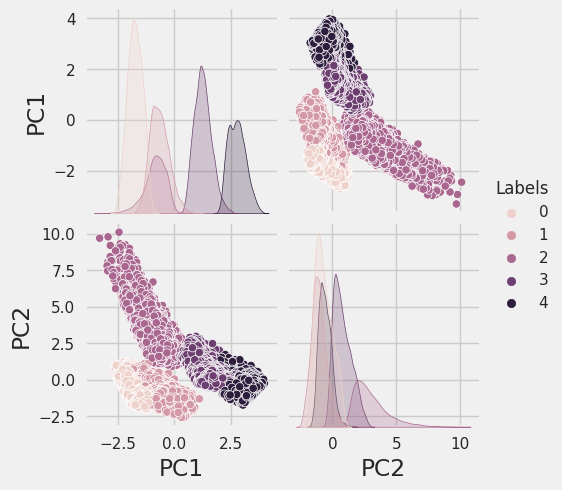

In [ ]:
# Compare the results of the PCA scatter plot with the previous scatter plot
sns.pairplot(data=df_pca, hue='Labels', diag_kind='kde', palette=(random.shuffle(colors)))
plt.tight_layout(rect = (2,2,2,2))

Text(0.5, 1.0, 'Customer Segmentation Based on LRFMC Model')

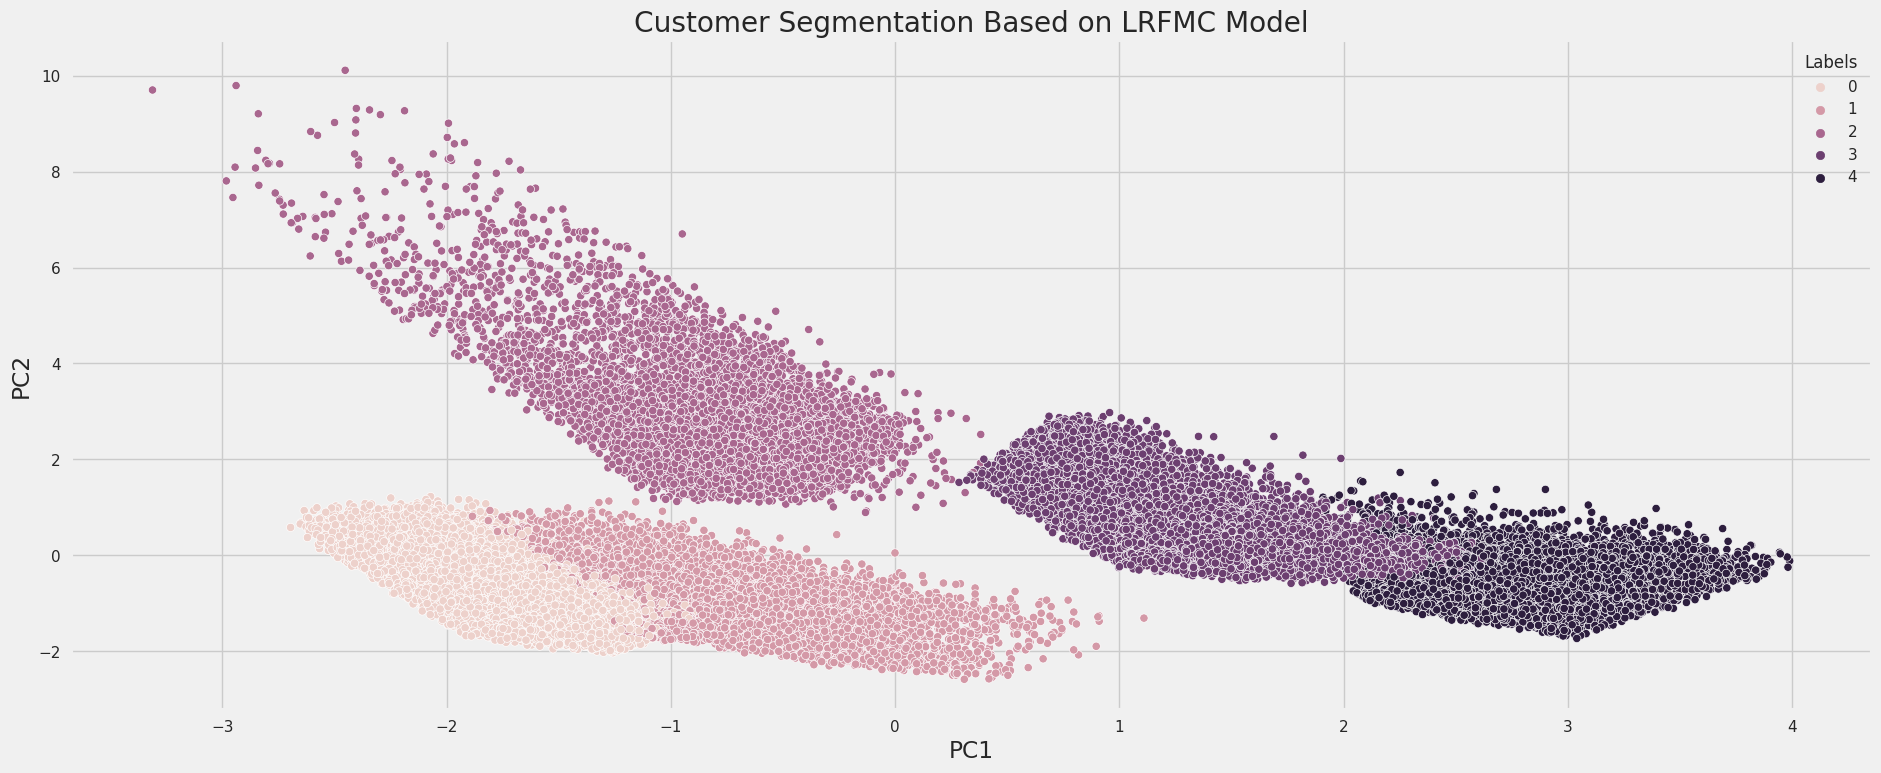

In [ ]:
# View label distribution with a scatter plot
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Labels", palette=(random.shuffle(colors)))
plt.title('Customer Segmentation Based on LRFMC Model')

# Analysis and Business Insight

In [ ]:
# Inserting labels into the original dataframe (before standardization)
df_new['Labels'] = kmeans.labels_

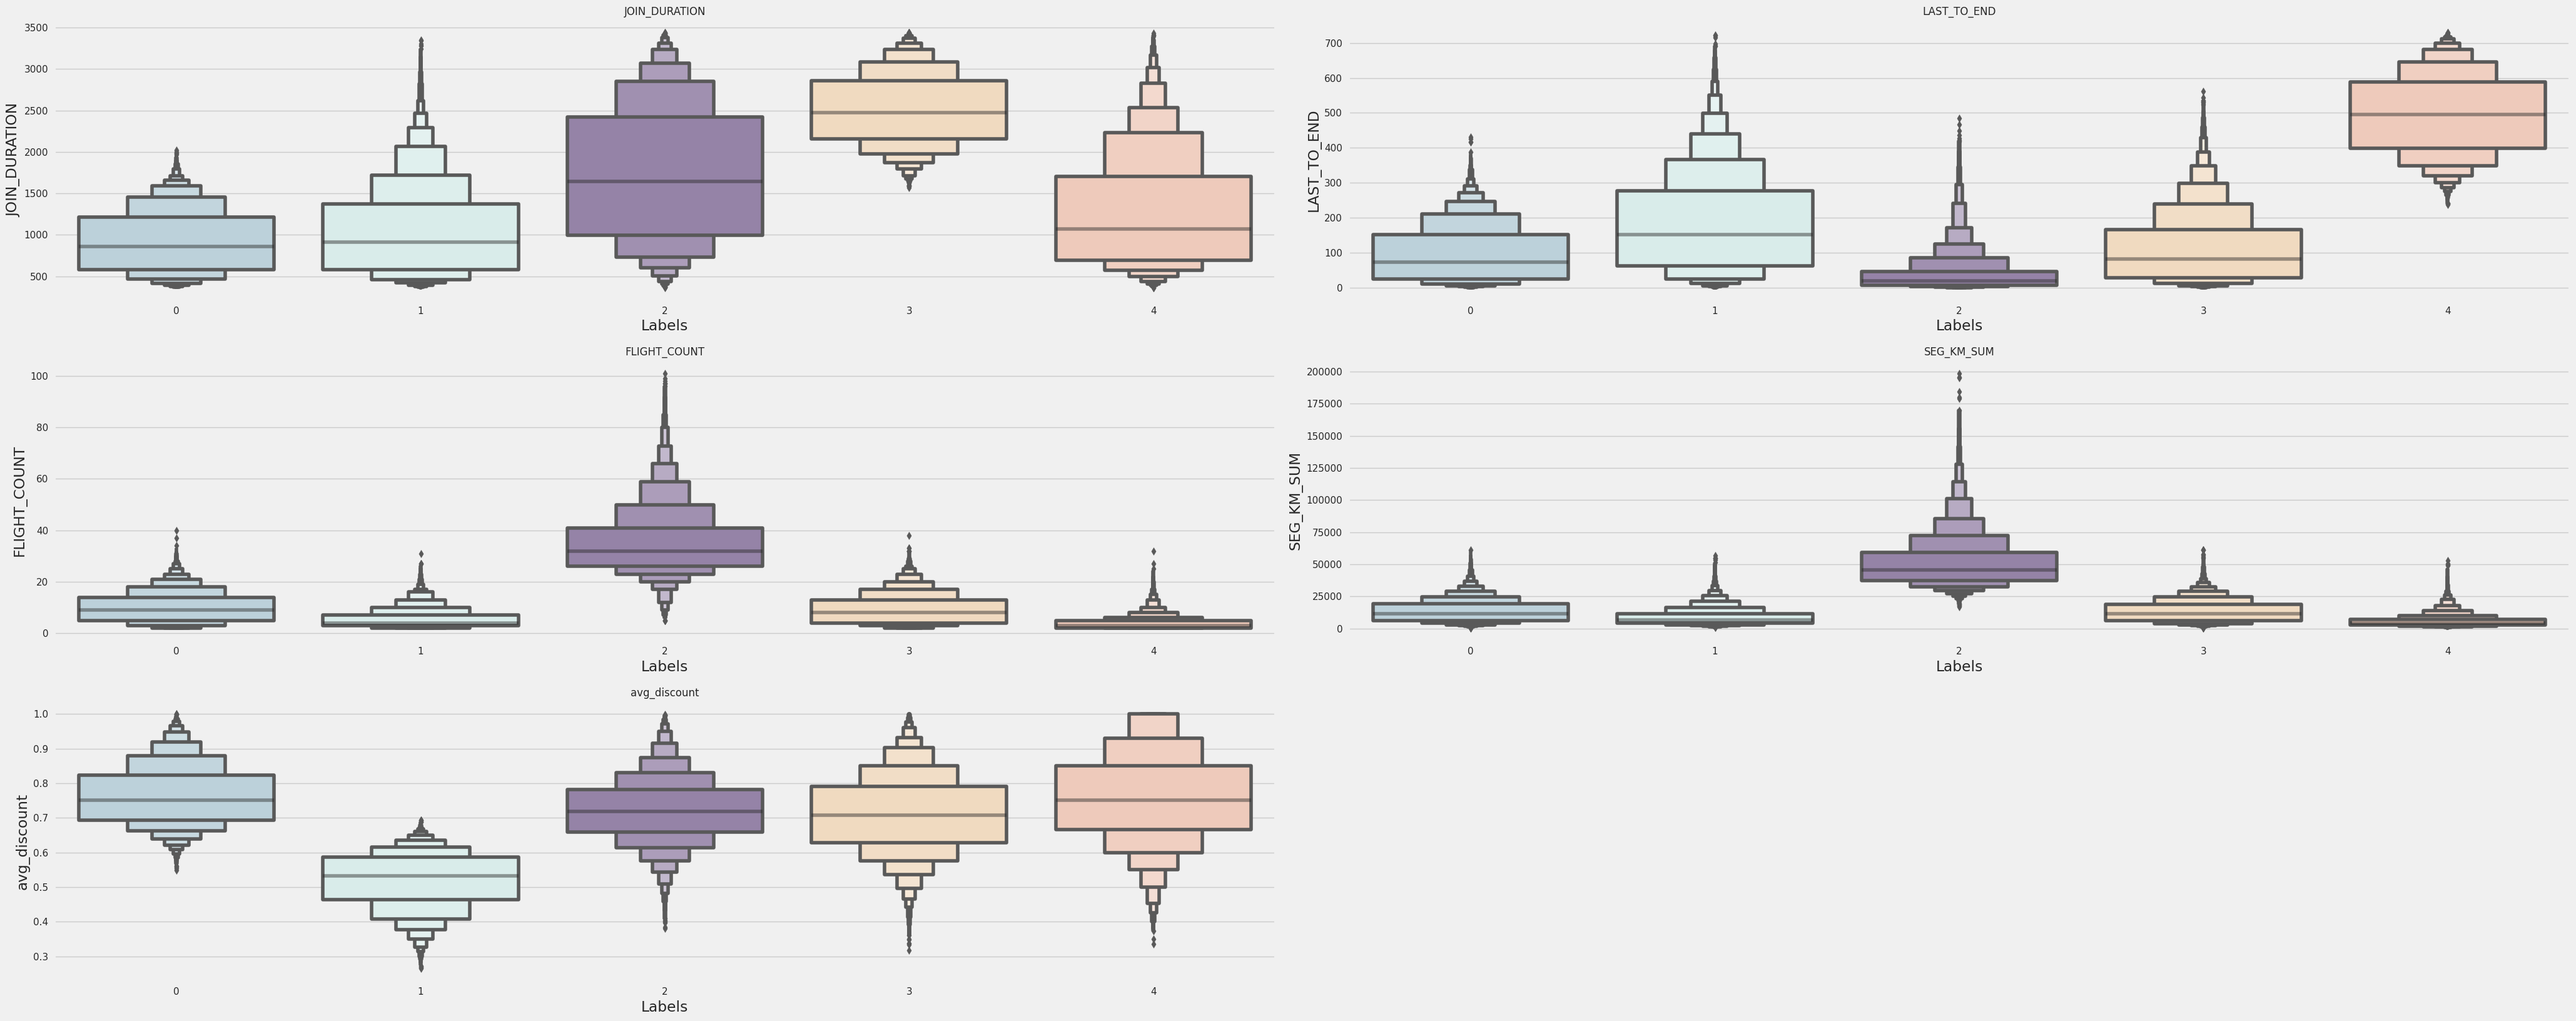

In [ ]:
for i in range(0, len(Features)):
  plt.subplot(3, 2, i+1)
  sns.boxenplot(x=df_new['Labels'], y=df[Features[i]], palette=colors)
  plt.gca().set_title(Features[i], fontsize=12)
plt.tight_layout(rect=(1,1,3,3))
plt.show()

In [ ]:
def mode(data):
    return stats.mode(data)[0][0]
# View mean, median, modus
df_new.groupby(['Labels']).agg(['mean','median','std'])

JOIN_DURATION                     LAST_TO_END                     \
                mean  median         std        mean median         std   
Labels                                                                    
0         919.427203   860.0  388.335289   96.996988   74.0   82.459680   
1        1036.879750   912.0  551.950655  182.552916  152.0  144.205770   
2        1731.156280  1642.0  829.626805   38.894796   19.0   53.936899   
3        2508.803666  2474.0  441.458462  111.353992   83.0  100.804205   
4        1268.656270  1068.0  700.447157  495.077436  496.0  116.567751   

       FLIGHT_COUNT                      SEG_KM_SUM                         \
               mean median        std          mean   median           std   
Labels                                                                       
0          9.820252    9.0   6.156315  13537.043793  11527.0   9068.812005   
1          5.687766    4.0   3.931967   8874.401560   6855.0   6749.657777   
2         34.868294   32.0  13.279921  50891.339383  45642.5  20479.507286   
3          9.448043    8.0   6.129428  13380.363234  11405.5   8925.934436   
4          3.857281    3.0   2.632600   5773.601205   4268.0   4840.916665   

       avg_discount                      
               mean    median       std  
Labels                                   
0          0.762782  0.750688  0.089997  
1          0.520865  0.532233  0.084088  
2          0.720805  0.718324  0.097090  
3          0.710389  0.707650  0.117186  
4          0.758284  0.750980  0.135901

In [ ]:
# View max, min, mode
df_new.groupby(['Labels']).agg(['max', 'min', mode])

JOIN_DURATION             LAST_TO_END           FLIGHT_COUNT           \
                 max   min  mode         max  min mode          max min mode   
Labels                                                                         
0               2023   365   454         431    1    4           40   2    2   
1               3347   365   454         723    1    4           31   2    2   
2               3437   365   746         484    1    1          101   5   28   
3               3437  1569  3125         561    1    1           38   2    2   
4               3429   365   699         729  238  402           32   2    2   

       SEG_KM_SUM               avg_discount                      
              max    min   mode          max       min      mode  
Labels                                                            
0           61184    368   1298     1.000000  0.548252  0.920000  
1           56889    716   3934     0.693133  0.264214  0.400000  
2          198627  16834  73392     0.998753  0.381285  0.663333  
3           61160    368   3934     1.000000  0.317766  0.920000  
4           52850    368   3934     1.000000  0.335723  1.000000

Text(0, 0.5, 'Value')

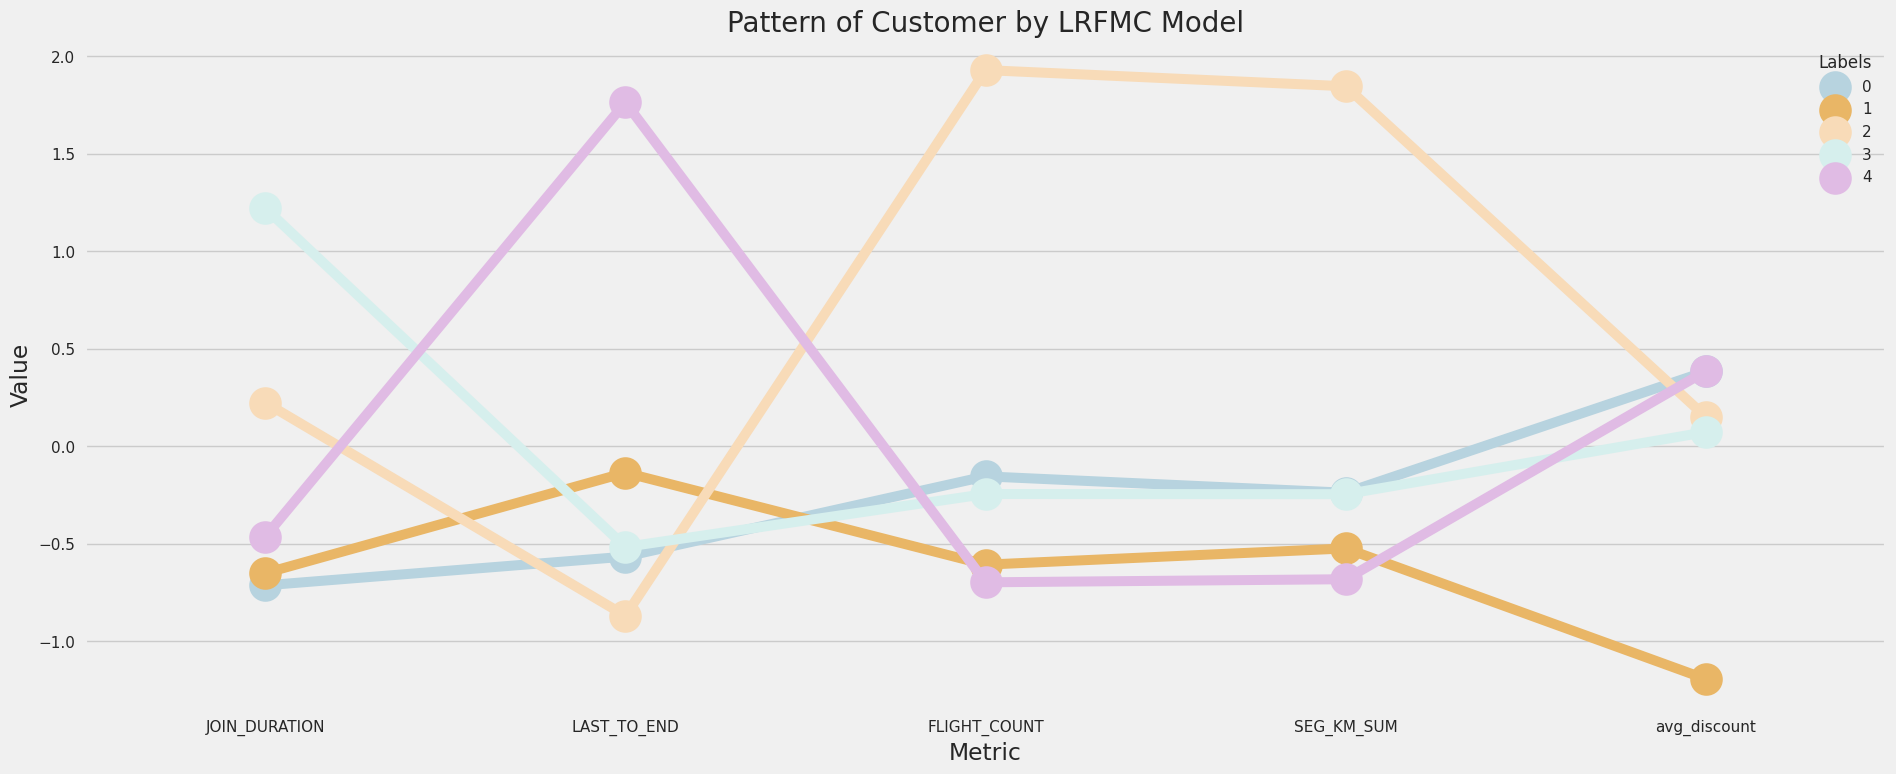

In [ ]:
# Analyze the pattern of each feature (LRFMC) from each Label using df_std (so that the scale is more balanced)
med_labels = df_std.groupby('Labels').median().reset_index()
df_melt = pd.melt(med_labels.reset_index(), id_vars='Labels', value_vars=Features, var_name='Metric', value_name='Value')

sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Labels', palette=colors)
plt.title('Pattern of Customer by LRFMC Model', fontsize=20)
plt.xlabel('Metric')
plt.ylabel('Value')

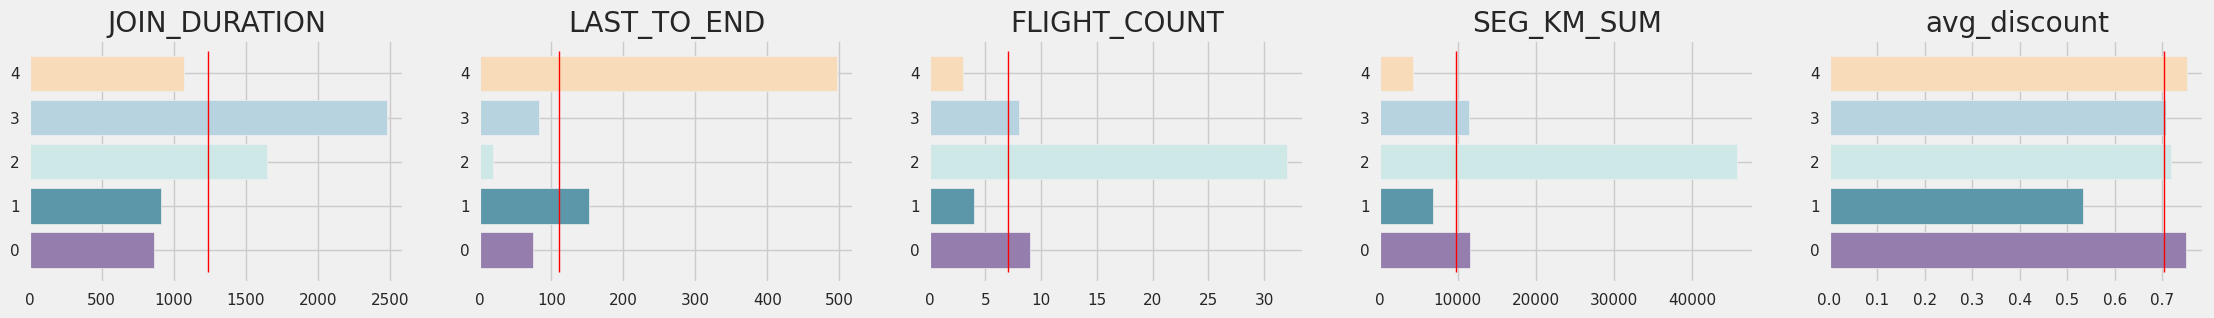

In [ ]:
# Analyze the distribution of each feature in the cluster with its threshold (median).

def dist_feats(value):
    plt.figure(figsize=[len(value)*5,3])
    i = 1
    for feats in value:
        ax = plt.subplot(1,len(value),i)
        ax.vlines(df_new[feats].median(), ymin=-0.5, ymax=4.5, color='red', linewidth=1)
        dfg = df_new.groupby('Labels')
        x = dfg[feats].median().index
        y = dfg[feats].median().values
        ax.barh(x,y, color=colors)
        plt.title(feats)
        i = i+1

dist_feats(Features)

Insights for each feature:
1. L, JOIN_DURATION, the higher the more loyal.
2. R, LAST_TO_END, the higher the date the ticket booked is after the member's last flight.
3. F, FLIGHT_COUNT, the higher the member flies more often.
4. M, SEG_KM_SUM, the higher the flight distance the member has traveled. It should be positively correlated with FLIGHT_COUNT.
5. C, avg_discount, the higher the discount the member gets.


From the visualization results above we can draw the conclusion that,
1. Label 0 = has a high C pattern and F and M above the median. L and R are low below the median.
2. Label 1 = has an R pattern above the median while LFMC is below the median.
3. Label 2 = has a very high F and M pattern and L and C above the median. R is low below the median.
4. Label 3 = has a high L pattern and FMC above the median. R is below the median.
5. Label 4 = has a very high R and C pattern but LFM is below the median.


**Cluster 0: New Potential Customers**
> The majority of this group of members are the newest members among the other groups, get discounts that are on average high and fly quite often, and have fairly close flight schedules (2-3 months in the future).

**Cluster 1: New Customers**
> This group of members has flight plans that are not very close (5 - 6 months in the future), are quite new members after New Potential Customers but do not have a high flight history and the average discount they get is also small.

**Cluster 2: Impactful Customers**
> This group of members flies very often and can be said to be the highest among other groups, this group gets quite high discounts and has been joining the FFP membership for quite a long time. The travel plans that this group is planning are also very close (2 weeks - 1 month in the future).


**Cluster 3: Most Loyal Customers**
> This group of members has the highest loyalty, with a history of flights and discounts that are quite high but not as high as **Impactful Customers**, planning their next flight quite close (2 - 4 months in the future).

**Cluster 4: Passive Customers**
> They are loyal members for quite a long time but have very little flight history and the next flight plans are very long (1 - 2 years in the future) even though this group gets very high discounts.


[Text(0, 2, '29.63'),
 Text(0, 2, '19.68'),
 Text(0, 2, '11.11'),
 Text(0, 2, '22.98'),
 Text(0, 2, '16.6')]

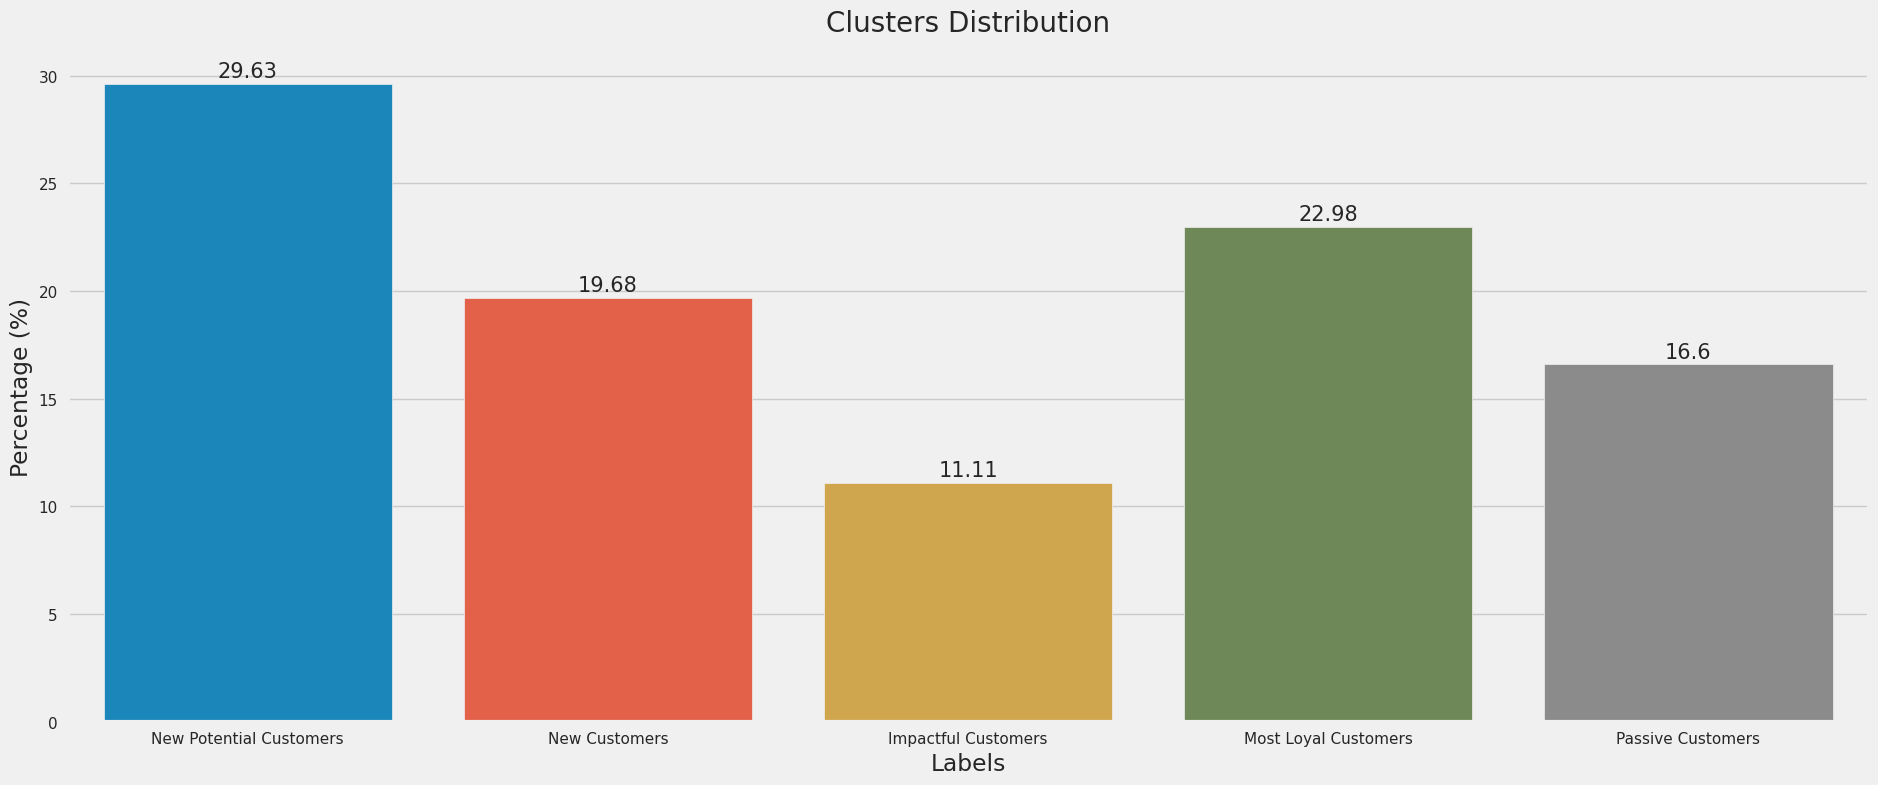

In [ ]:
new_label = ['New Potential Customers', 'New Customers', 'Impactful Customers', 'Most Loyal Customers', 'Passive Customers']
df_lab = df_new['Labels'].value_counts().reset_index()
df_lab.columns = ['Labels', 'count']
df_lab['Percentage (%)'] = round((df_lab['count']/len(df_new))*100,2)
df_lab = df_lab.sort_values(['Labels']).reset_index(drop=True)
df_lab

fig,ax = plt.subplots(1,1)
sns.barplot(x = df_lab['Labels'], y = df_lab['Percentage (%)'], palette=(random.shuffle(colors)), ax=ax)
ax.set_title('Clusters Distribution',fontsize=20,pad=15)
ax.set_xticklabels(new_label)
ax.bar_label(ax.containers[0], fontsize=15, padding=2)

# Business Recommendation

From the dataset it can be seen that there are many outliers which tend to be less logical, therefore it is a good idea to update the data. The Action Plan carried out is implemented via the FFP application and email for those who do not have the FFP application. Customers who do not have the FFP application will be directed via email so that customers immediately re-register in the FFP application to update their data and customers who have registered and updated their data in the FFP application will receive a "*Welcome Gift*" in the form of a discount voucher. If the customer already has the FFP application, he will be asked to update his data and will be given a discount voucher "*Any New Destinations?*".

Treatment for email customers and users of the FFP application will also be differentiated to increase customer interest in the FFP application.

**Cluster 0: New Potential Customers**
* This group is a new and quite active member and is very connected with the discounts they get.
* Action Plan:
  > Providing recommendations for interesting destinations and the cheapest prices from these destinations, which along with the recommendations includes claiming additional discount vouchers which lead to the FFP application.
  >
  > Gives points if you fly 6 times in 1 year (Silver Member) and rewards in the form of products/souvenirs/discount vouchers that can be exchanged.
  >
  > Carrying out the "*Fly with Us*" campaign with the aim of keeping customers active so they can become **Impactful Customers** / **Most Loyal Customers**.

**Cluster 1: New Customers**
* This group does not get many discounts which is thought to be the cause of the small running history this group has.
* Action Plan:
  > Send an email *redeem code* discount which has a validity period via email and a recommendation to continue it to the FFP application or can be exchanged directly when buying tickets at the airport.
  >
  > Gives points if you fly 6 times in 1 year (Silver Member) and rewards in the form of products/souvenirs/discount vouchers that can be exchanged.
  >
  > Carry out an alternative campaign "*Fly with Us*" to make customers more active **New Potential Customers**.

**Cluster 2: Impactful Customers**
* This group is the most active group carrying out flights so it is called Impactful.
* Action Plan:
  > Sending "Thank you for Trusting Us." and provide discount vouchers for each customer as well as souvenirs that can be exchanged directly.
  >
  > Gives points for every 3 flights in 1 year (Gold Member) and rewards in the form of products/souvenirs/discount vouchers that can be exchanged.
  >
  > Carrying out the "*Share to Explore the World*" campaign where these customers can be considered affiliates of FFP and get a *referral code* which can be exchanged for points. Apart from that, this campaign also focuses on building good relationships with customers.

**Cluster 3: Most Loyal Customers**
* This group is the group that has been with FFP membership the longest and has relatively active flights.
* Action Plan:
  > Sending greetings in the form of a short letter "*After <duration datetimes>  together, we've shared <flight_count> trips together, I'm so thankful for always choosing us. I still remember when we went to <most_visited> together, it was so amazing. Why don't we plan our next trip?*"  By writing this down it is hoped that customers can reminisce and increase the possibility of flying.
  >
  > Gives points for every 3 flights in 1 year (Gold Member) and rewards in the form of products/souvenirs/discount vouchers that can be exchanged.
  >
  > Carrying out the "*Share to Explore the World*" campaign where these customers can be considered as affiliates of FFP and get a *referral code* which can be exchanged for points. Apart from that, this campaign also focuses on building good relationships with customers.

**Cluster 4: Passive Customers**
* This is a group that tends to be inactive even though they have been joining for a long time and there are high discounts, their flight patterns are very low.
* Action Plan:
  > This group requires special attention, perhaps by providing regular destination recommendations along with interesting descriptions of the destination.
  >
  > Providing attractive personalized discount/promo vouchers.
  >
  > Gives points for every 9 flights in 1 year (Bronze Member) and rewards in the form of products/souvenirs/discount vouchers that can be exchanged.
  >
  > Carrying out the "Escape Trip" campaign, this campaign was carried out to increase the interest of this group and survey the causes of the low interest of this group.
